In [1]:
import pandas as pd
from copy import deepcopy
import numpy as np

In [2]:
barcodes = pd.read_csv('https://raw.githubusercontent.com/juliendelile/MouseSpinalCordAtlas/master/output/phenoData_annotated.csv', sep = '\t', index_col = 0)
selected_genes = pd.read_csv('/Users/sophielohshvits/Desktop/selected_genes.csv', sep = ',', index_col = 0)

In [12]:
# log2_ts_tp возвращает таблицу с не нормированными каунтами от timepoint, типа клеток type_step

def counts_ts_tp(type_step, timepoint): 
    
    barcodes_tp = barcodes[barcodes["timepoint"] == timepoint]
    
    selected_genes_tp = selected_genes[barcodes_tp.loc[~barcodes_tp[type_step].isna()].index]
    barcodes_tp = barcodes_tp.loc[~barcodes_tp[type_step].isna()]
    
    subtypes_by_barcodes = barcodes_tp[type_step]
    
    genes_renamed_columns = deepcopy(selected_genes_tp)
    new_cols = {key: value for key, value in zip(genes_renamed_columns.columns.values, subtypes_by_barcodes.values)}
    genes_renamed_columns.rename(columns = new_cols, inplace=True)
    genes_cell_types_counts = genes_renamed_columns.groupby(lambda x: x, axis=1).sum()

    depth = pd.read_csv('https://raw.githubusercontent.com/eentartetekunst/latrophilines/main/depth.tsv', sep = '\t', index_col = 0)
    depth = depth.loc[subtypes_by_barcodes.index]
    depth = depth.T
    
    depth_cols = {key: value for key, value in zip(depth.columns.values, subtypes_by_barcodes.values)}
    depth.rename(columns = depth_cols, inplace=True)
    celltypes_depth = depth.groupby(lambda x: x, axis=1).sum()
    
    celltypes_norm = genes_cell_types_counts.div(celltypes_depth.values, axis=1) * 1e6
    
    log_celltypes_norm = celltypes_norm.apply(lambda x: x + 1, axis=1)
    log_celltypes_norm = np.log2(log_celltypes_norm)

    log_celltypes_norm = log_celltypes_norm.rename(index={"ENSMUSG00000013033":'ADGRL1',"ENSMUSG00000028184": 'ADGRL2',"ENSMUSG00000037605": 'ADGRL3',"ENSMUSG00000016150": 'TENM1',"ENSMUSG00000049336": 'TENM2',"ENSMUSG00000031561": 'TENM3',"ENSMUSG00000048078": 'TENM4',"ENSMUSG00000047787": 'FLRT1',"ENSMUSG00000047414": 'FLRT2',"ENSMUSG00000051379": 'FLRT3',"ENSMUSG00000024109": 'NRXN1'})


    return log_celltypes_norm

In [13]:
counts_ts_tp(type_step="Type_step1", timepoint=9.5)
data = counts_ts_tp(type_step="Type_step1", timepoint=9.5)

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,Hematopoeitic,Mesoderm I,Mesoderm II,Mesoderm III,Mesoderm IV,Mesoderm V,...,Myoblast,Neural Crest I,Neural Crest II,Neural crest neurons I,Neural crest neurons II,Neural crest neurons III,Neuron,Outliers,Progenitor,Skin
ADGRL1,3.117803,0.00000,2.700142,0.991206,3.081591,3.793882,3.963363,3.750994,3.338401,3.408848,...,2.079120,2.904627,2.733222,3.949828,2.570820,4.027452,2.903179,4.410620,3.347353,3.862684
ADGRL2,6.233548,2.31561,6.005278,0.991206,0.000000,5.480801,5.500398,5.491916,5.742663,5.522143,...,7.022587,5.186461,4.701478,5.214624,4.937759,6.094921,5.486138,6.437608,6.138432,6.252912
ADGRL3,1.831965,0.00000,1.906633,0.000000,0.000000,2.258595,2.103163,2.415534,2.786144,2.220667,...,2.897432,1.057536,1.386321,2.682557,3.443996,2.022004,3.071514,2.228083,2.279375,1.324960
TENM1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.345219,0.000000,0.000000,0.000000,0.000000,0.388031,0.000000,0.000000,0.000000
TENM2,0.000000,0.00000,0.000000,0.000000,0.000000,0.171431,0.000000,0.148452,0.000000,0.595360,...,0.000000,0.345219,0.000000,0.000000,0.000000,0.000000,1.511791,1.507189,0.632890,2.463565
TENM3,4.032215,1.57970,4.832551,0.991206,3.081591,5.105863,5.085978,5.024070,4.522485,4.762268,...,5.423962,5.028135,5.425153,4.812479,4.937759,4.487378,5.698219,5.498932,5.746328,5.619657
TENM4,0.000000,1.57970,3.209140,1.311368,0.000000,4.754464,4.982326,4.823320,4.453551,4.702194,...,4.098240,4.256483,4.348327,4.613906,3.443996,4.671961,4.375095,4.929833,5.076138,3.862684
FLRT1,0.000000,0.00000,0.000000,0.000000,0.000000,1.330043,1.527929,0.624706,1.880033,0.595360,...,0.000000,3.144040,2.898488,3.040291,3.443996,3.348292,0.693509,0.942066,0.514296,2.003789
FLRT2,5.391062,0.00000,3.209140,0.000000,0.000000,5.472626,4.531921,4.898638,4.488430,4.828611,...,0.000000,1.390701,1.386321,1.488845,0.000000,0.000000,1.511791,4.530487,2.185470,4.464253
FLRT3,2.613634,0.00000,3.584640,1.794775,0.000000,5.865016,5.980999,5.637224,5.606408,5.927294,...,4.559398,5.911817,5.885282,4.383571,5.340980,5.810097,4.309248,6.637737,5.147605,5.935705


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [104]:
def heatmap(data, timepoints, type_step_x):

    figure(figsize=(30,15))
    b = sns.heatmap(data.iloc[:, :])

    b.axes.set_title("day {}, {}".format(timepoints,type_step_x) ,fontsize=50)
    b.set_xlabel("Subtypes of cells",fontsize=30)
    b.set_ylabel("Genes",fontsize=20)
    b.tick_params(labelsize=20)
    plt.xticks(rotation=45)             
    plt.yticks(rotation=45)             
    plt.subplots_adjust(bottom = 0.15)
    plt.tight_layout()
    plt.savefig("heatmap_day_{}_{}.pdf".format(timepoints, type_step_x), dpi=1000)


    return b

In [105]:
def barplot(data, timepoints, type_step_x):
    figure(figsize=(30,15))
    a = sns.barplot(x=data.columns, y = data.loc['ADGRL1'])

    a.axes.set_title("day {}, {}".format(timepoints, type_step_x) ,fontsize=50)
    a.set_xlabel("Subtypes of cells",fontsize=30)
    a.set_ylabel("ADGRL1 log2",fontsize=30)
    a.tick_params(labelsize=20)
    plt.xticks(rotation=45)             
    plt.subplots_adjust(bottom = 0.15)
    plt.tight_layout()
    plt.savefig("barplot_day_{}_{}.pdf".format(timepoints, type_step_x), dpi=1000)


    return a

In [106]:
barcodes

,timepoint,replicate_id,Type_step1,Type_step2,Type_step2_unique,DV,Neuron_subtypes,Pseudotime
AAACCTGAGCAGACTG-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
AAACCTGCAAGCGAGT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTCCCTACT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCAGCACAT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCCCTTGCA-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
TTTGTCAAGCTATGCT-11,13.5,3,Neuron,dl2,dl2,11.0,dl2.1,95.128997
TTTGTCAGTAGCTAAA-11,13.5,3,Neuron,dl4,dl4.1,9.0,dl4.6,83.166268
TTTGTCATCAGGTTCA-11,13.5,3,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCATCGGAATCT-11,13.5,3,Neuron,Null_Neuron,Null_Neuron,NaN,NaN,NaN


In [107]:
timepoints = set(barcodes['timepoint'].values)

In [108]:
columns = ["Type_step1", "Type_step2"]

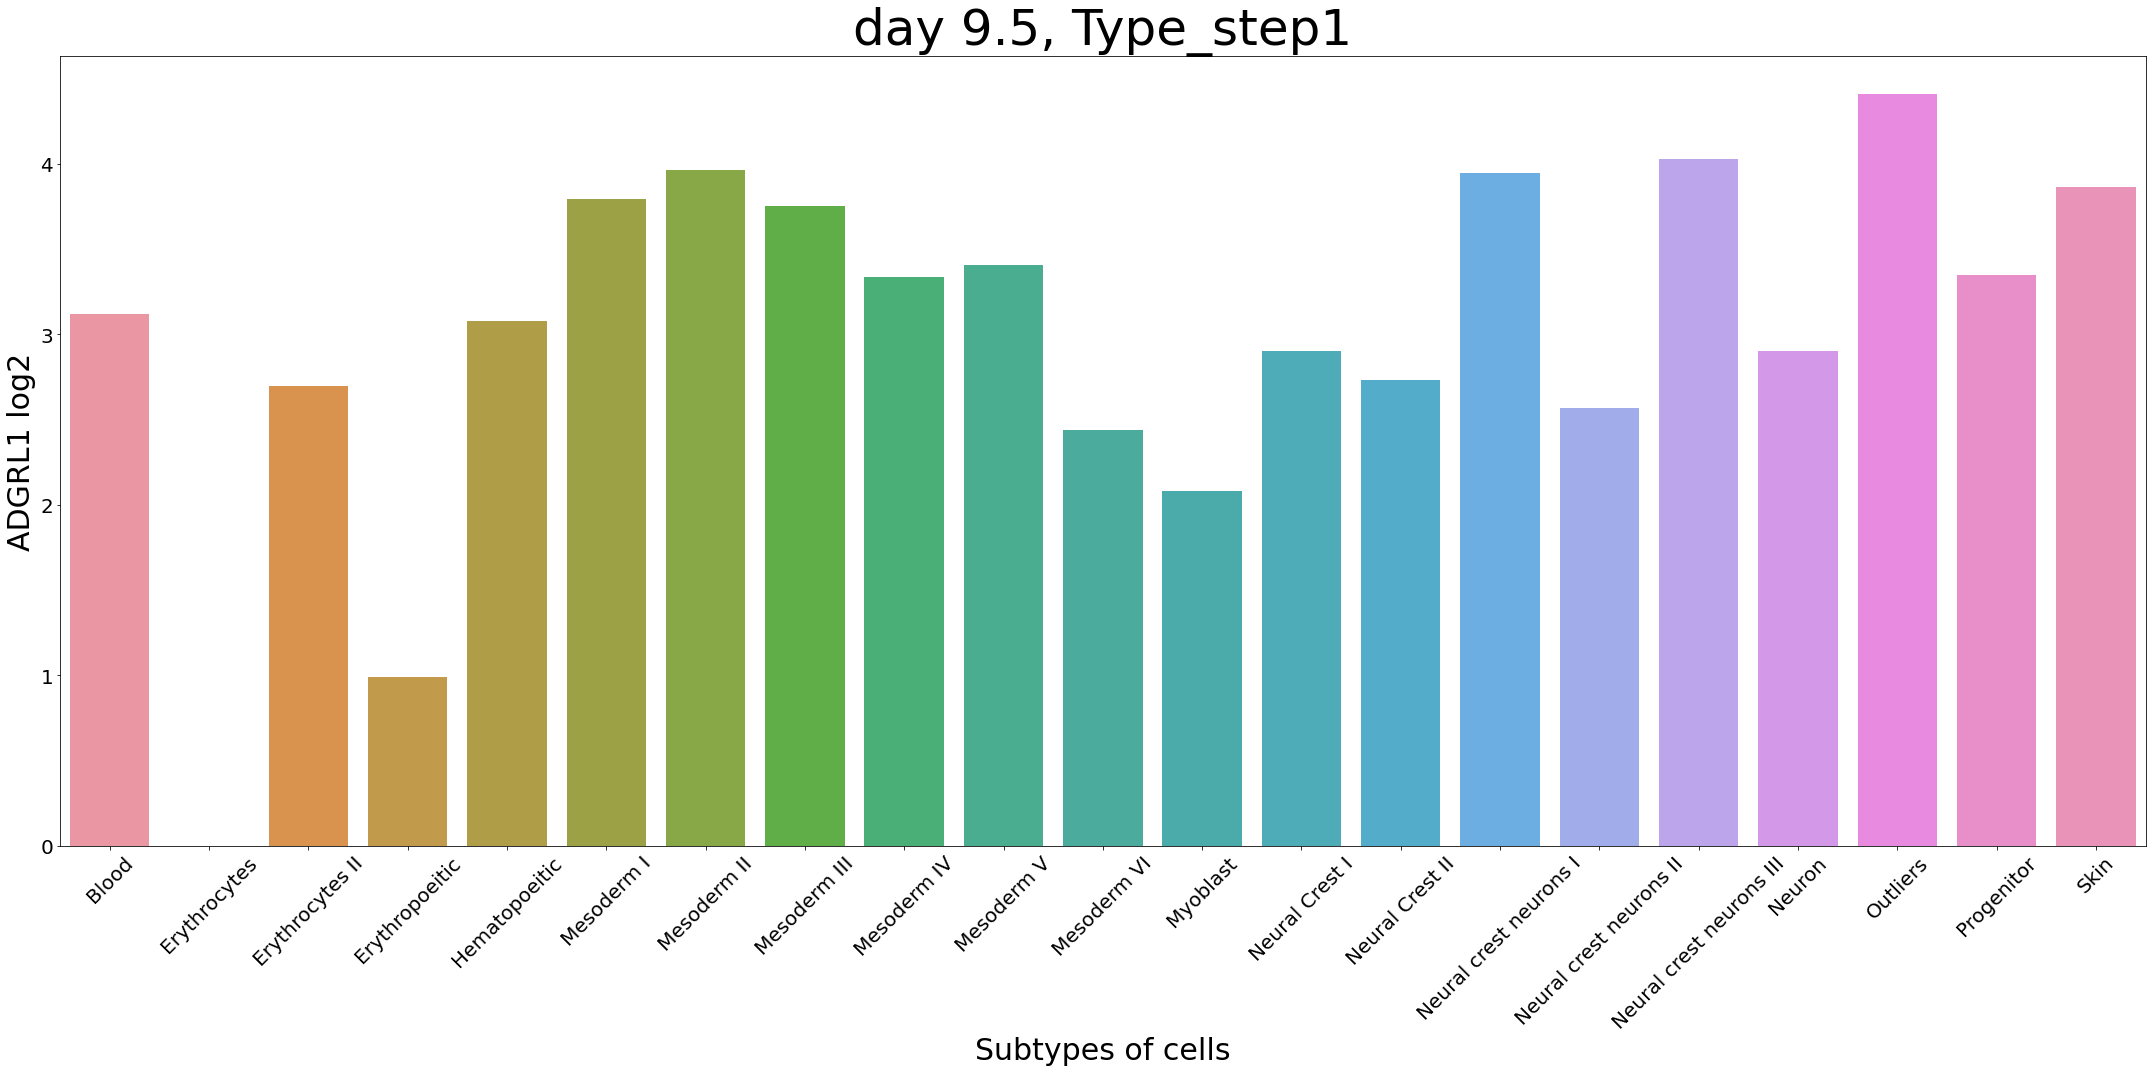

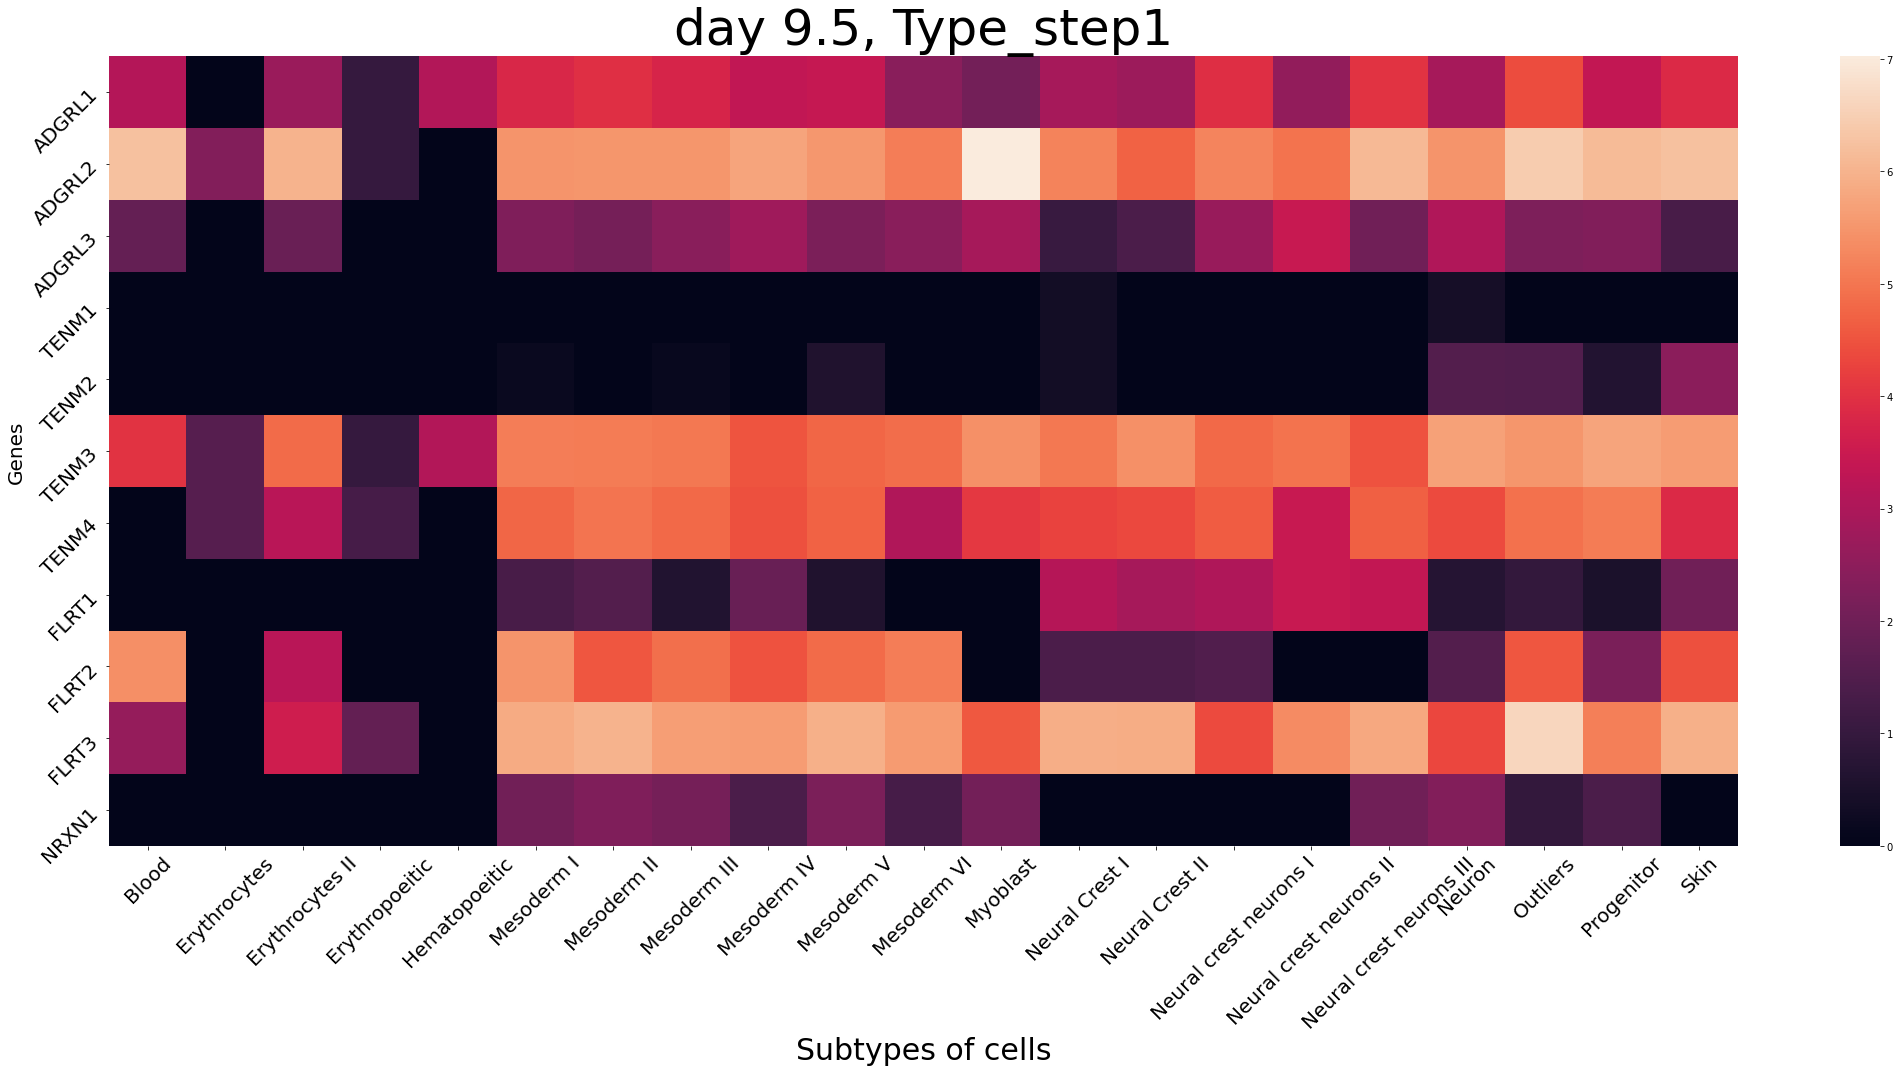

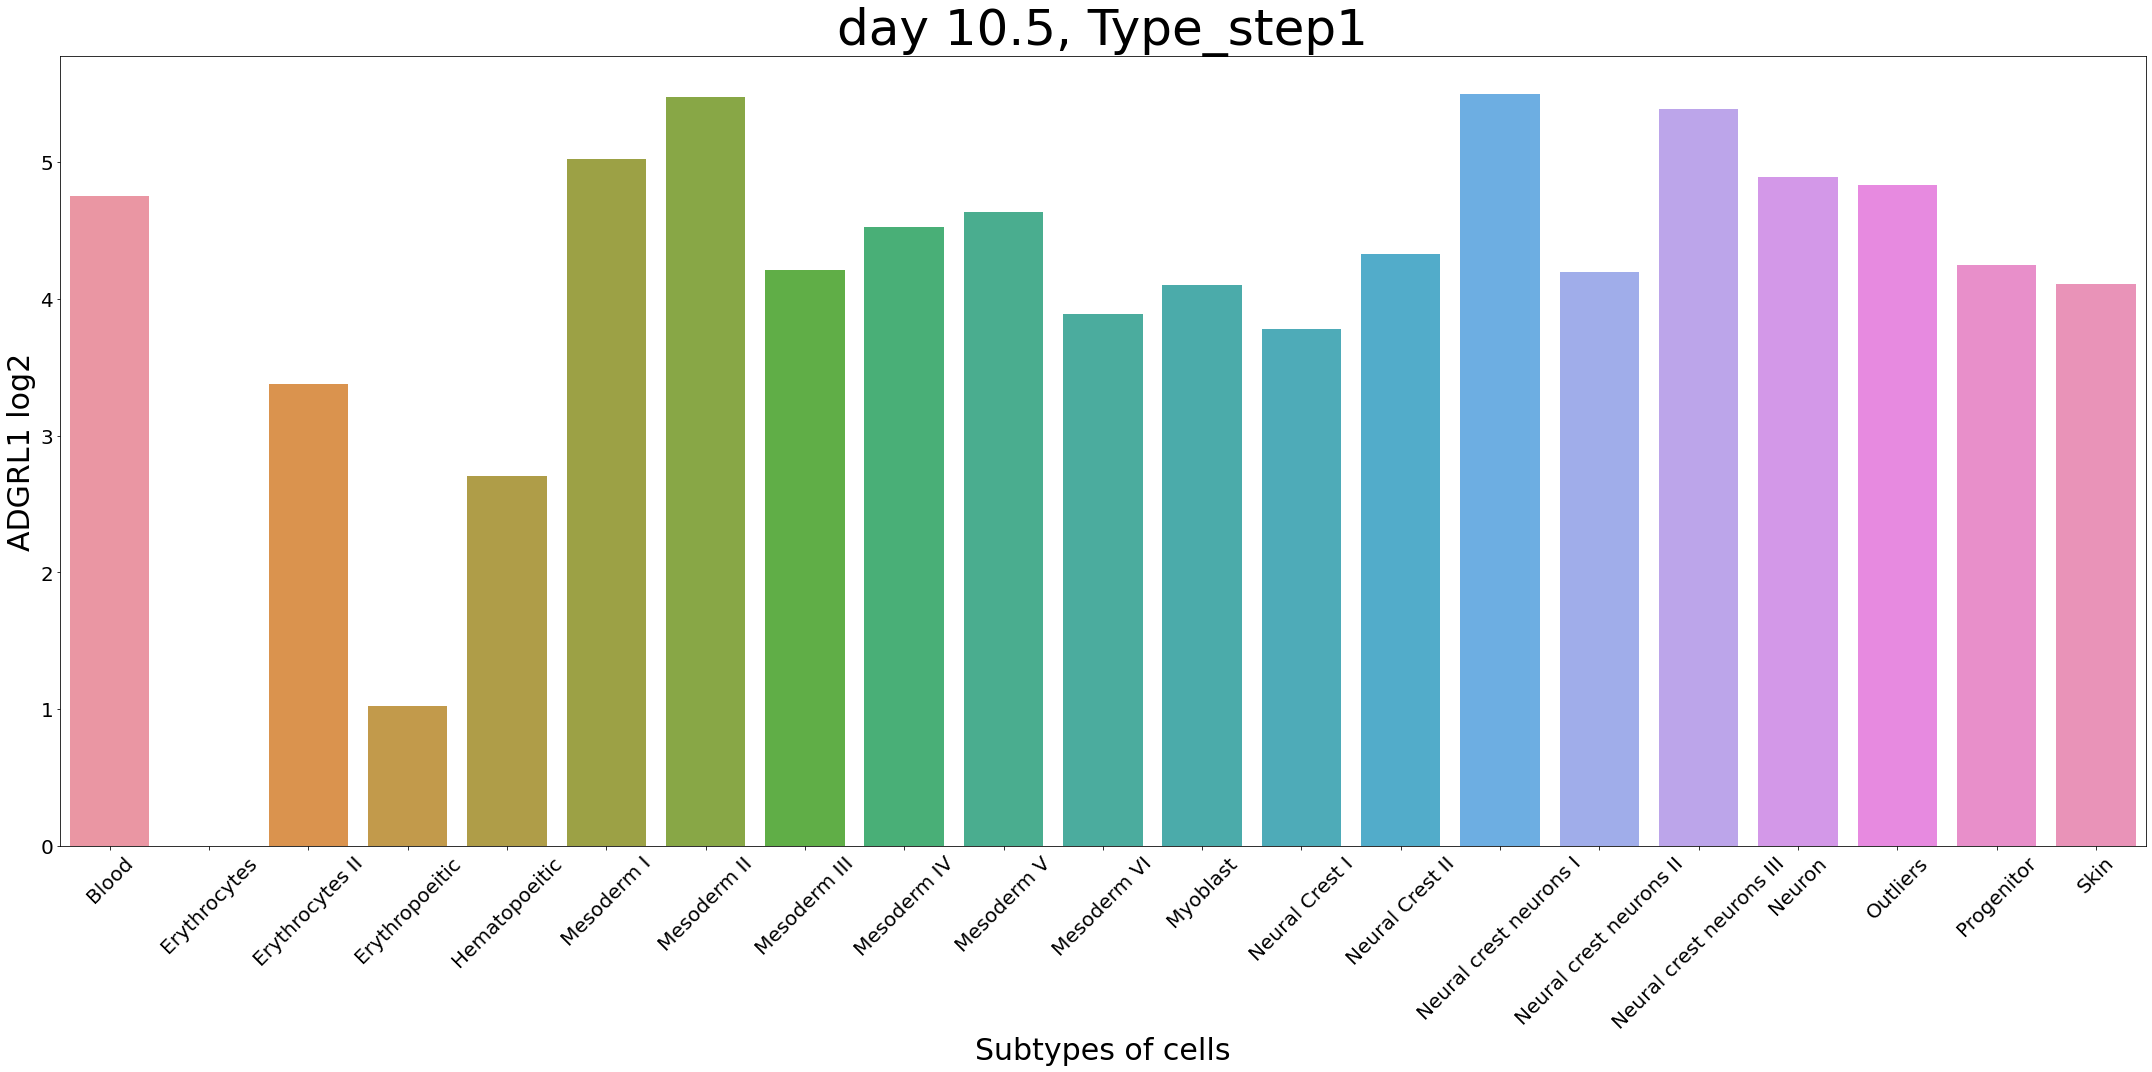

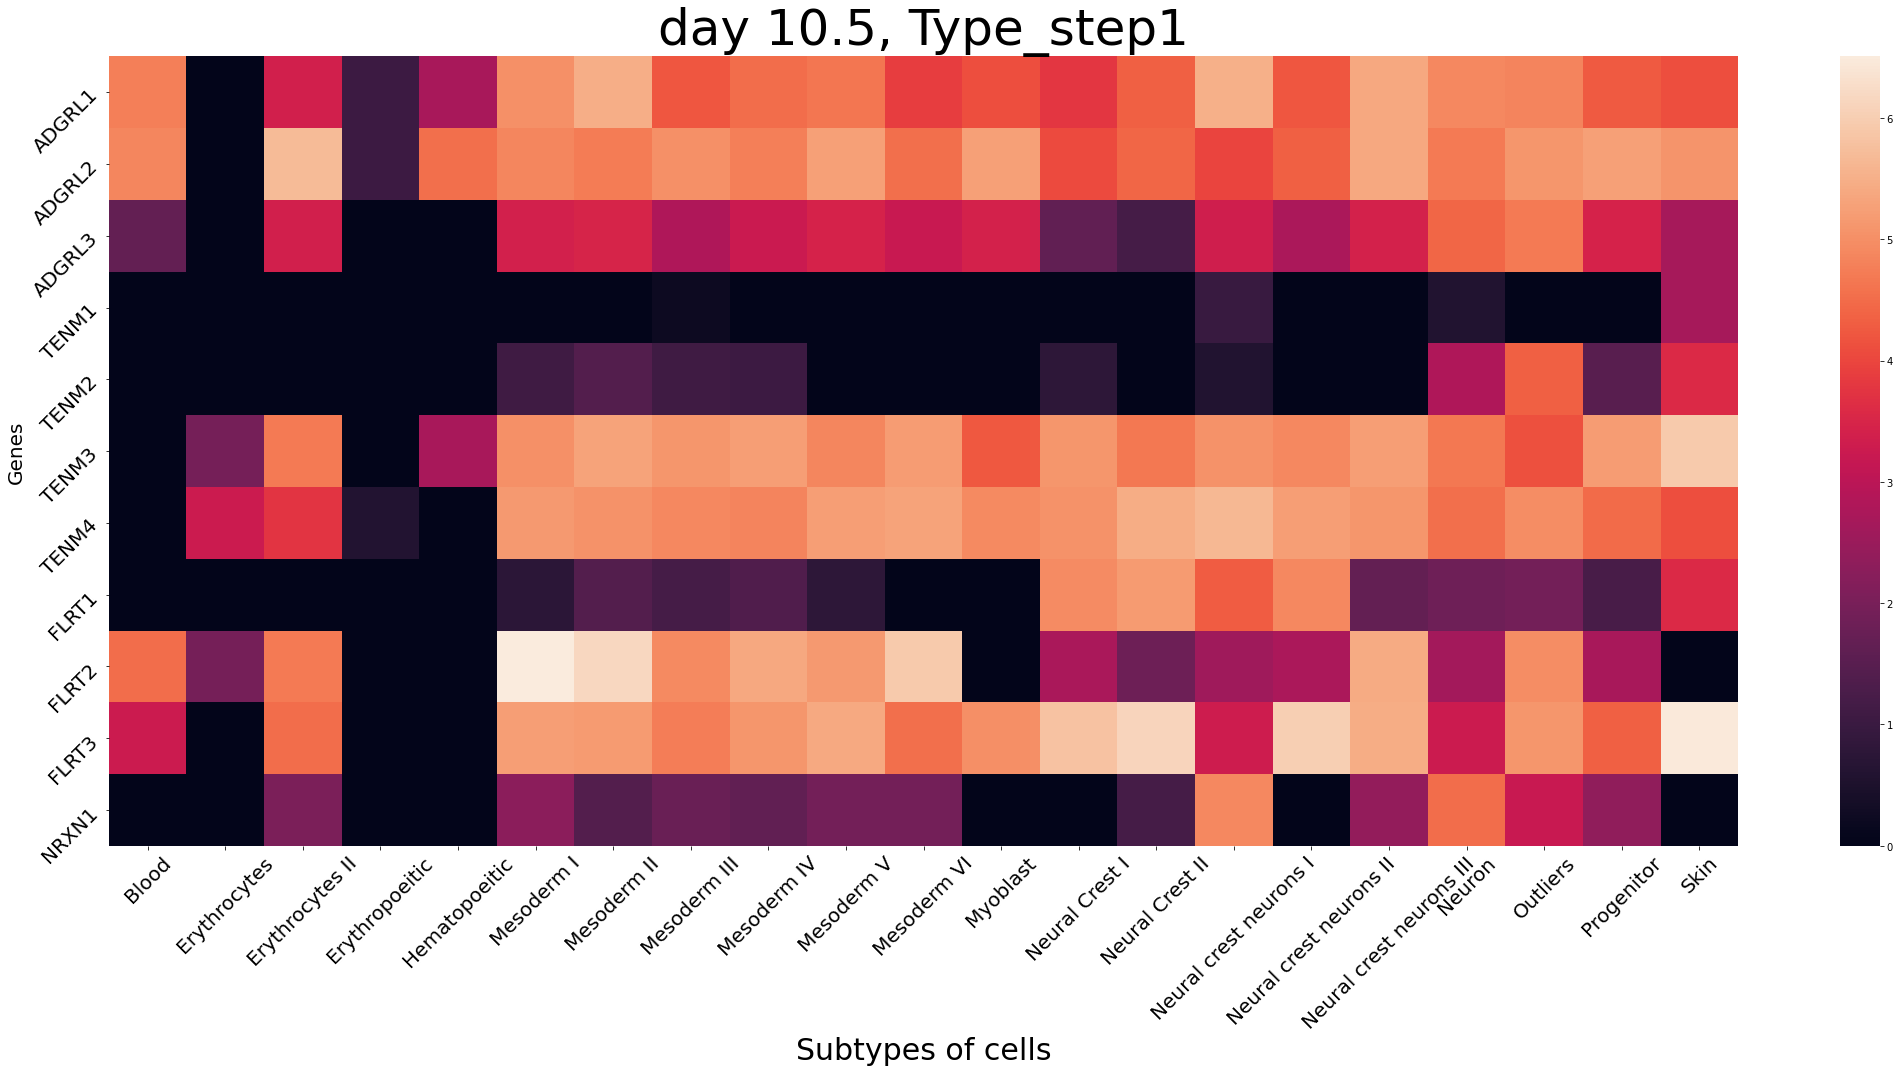

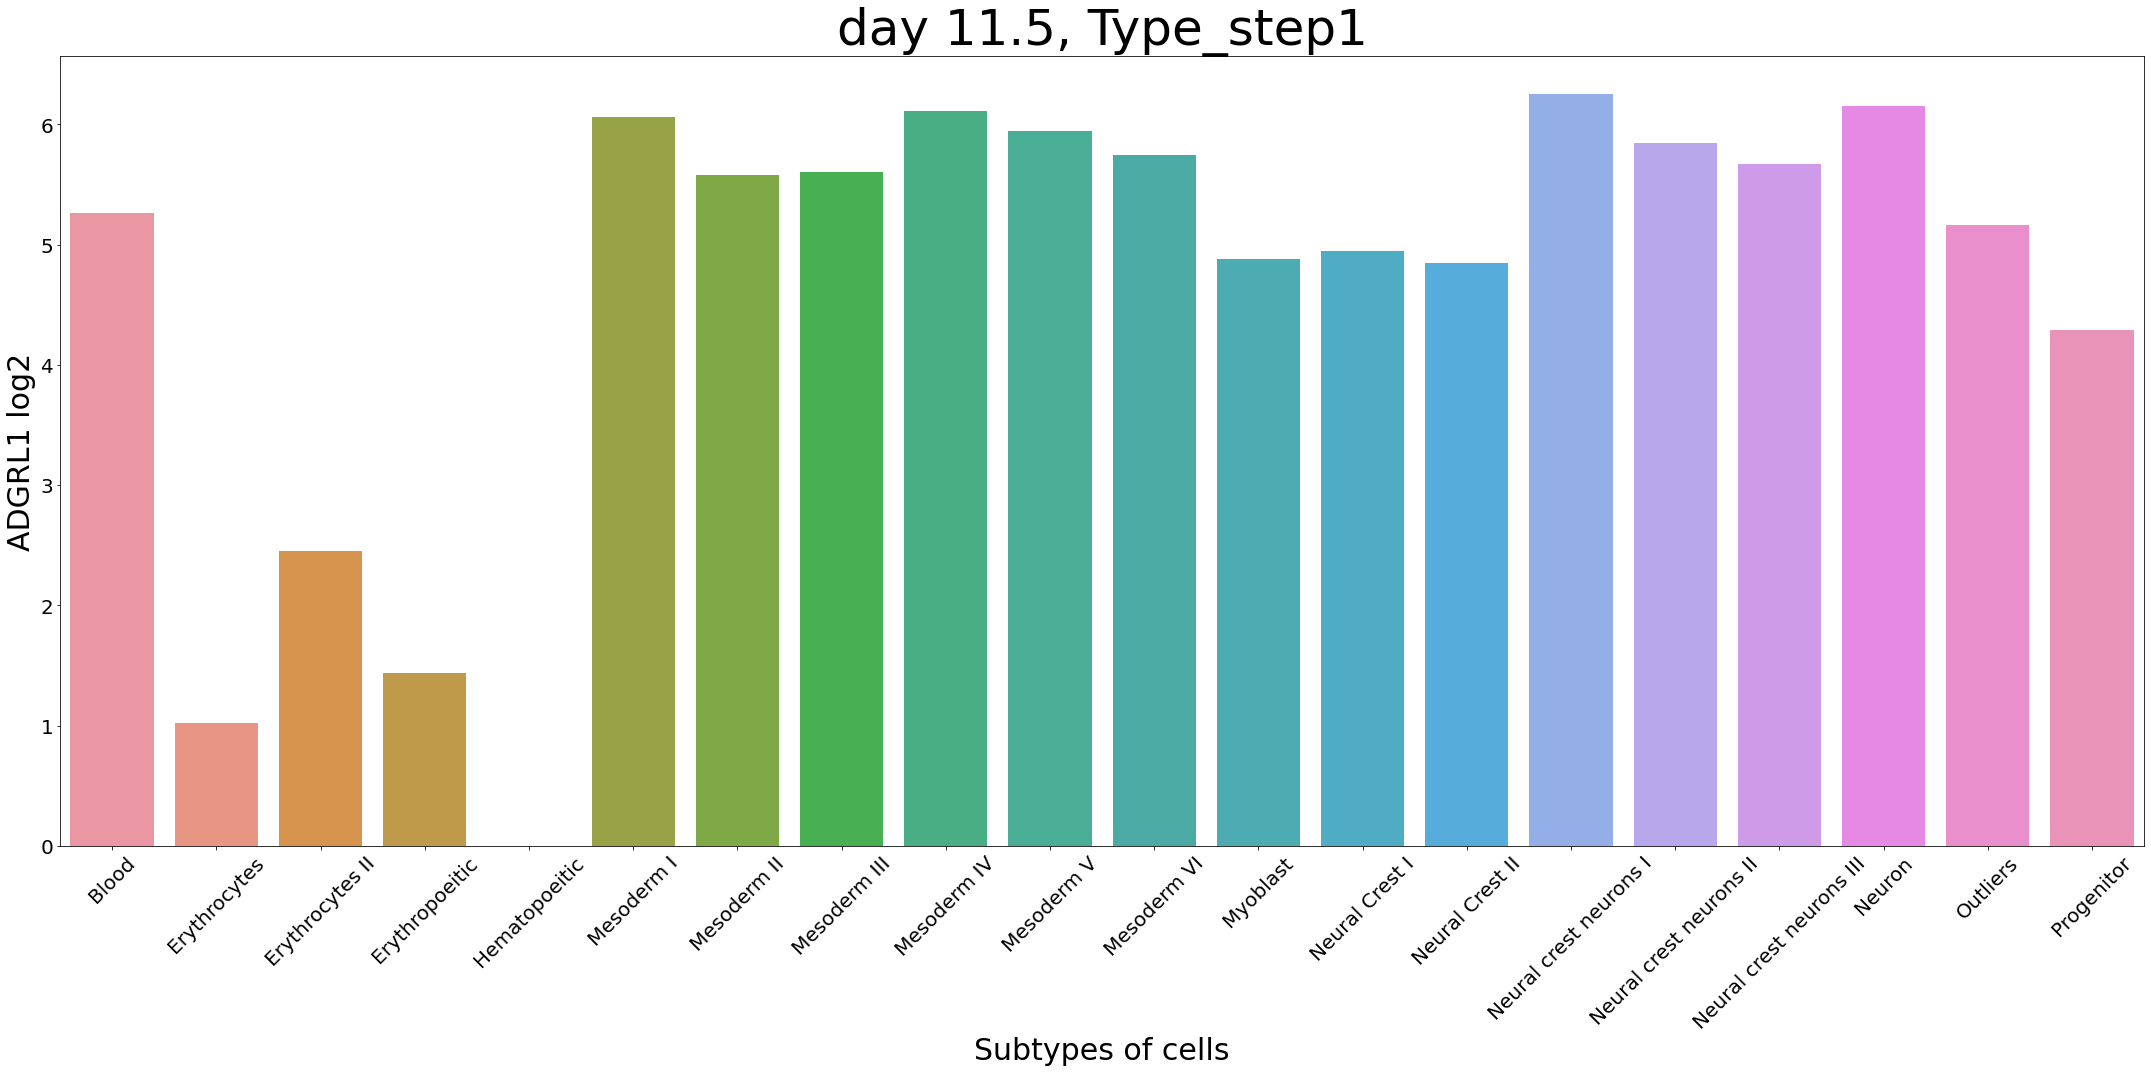

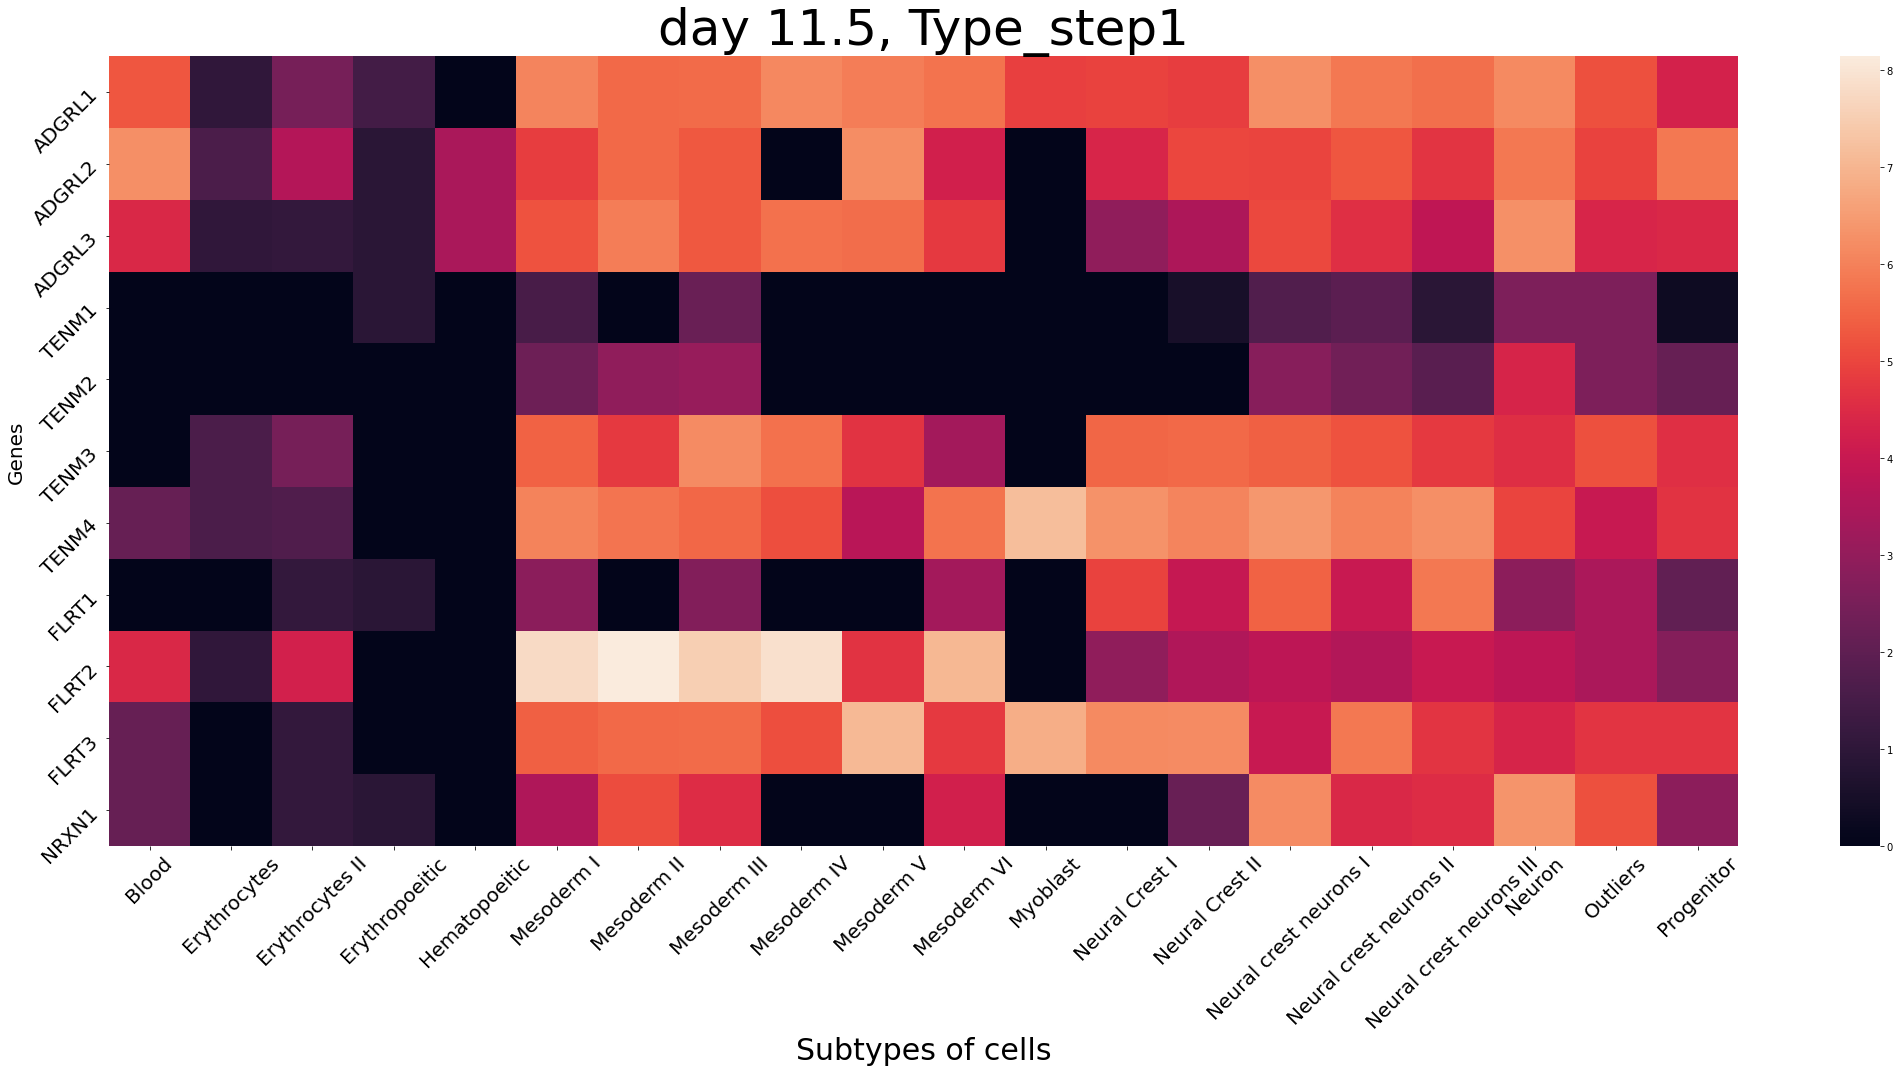

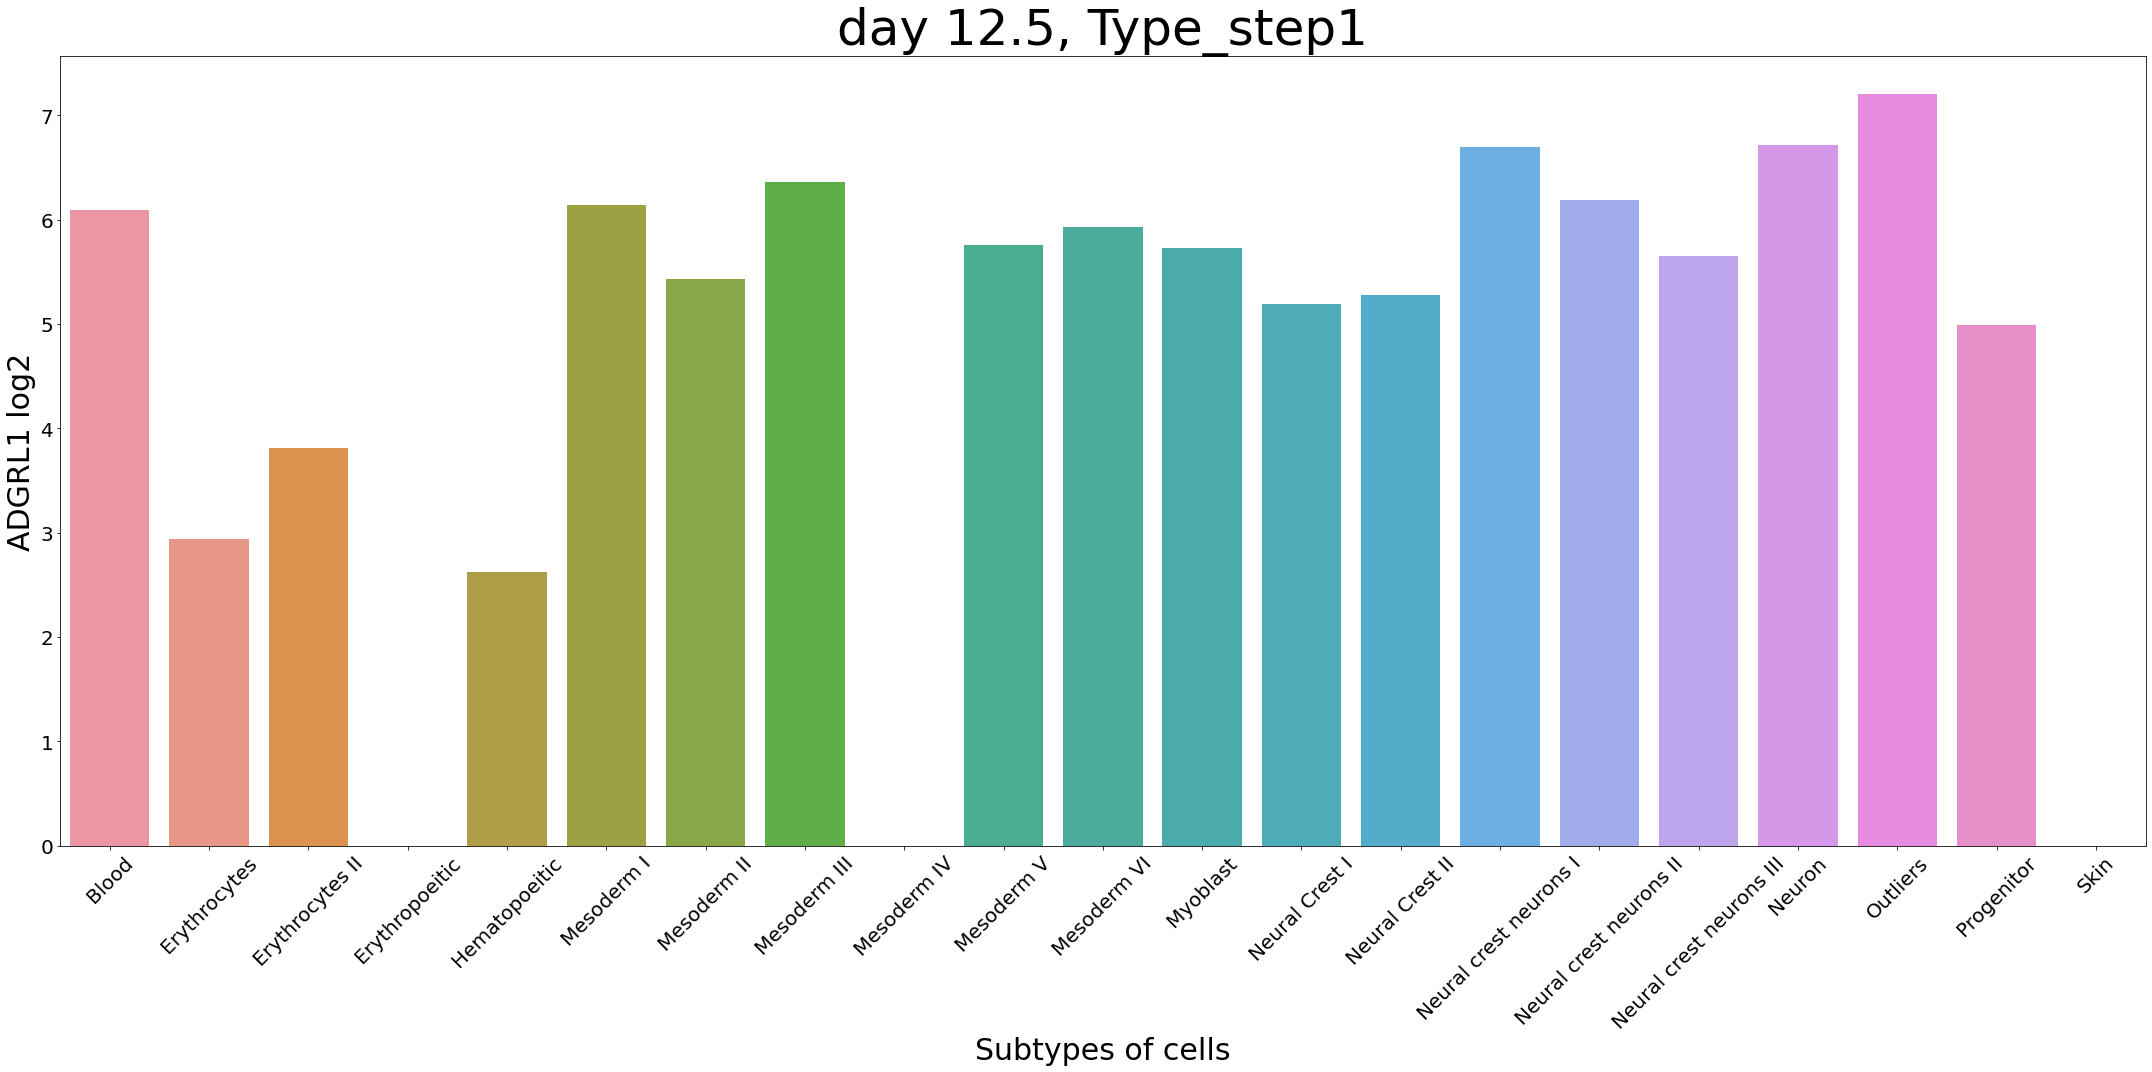

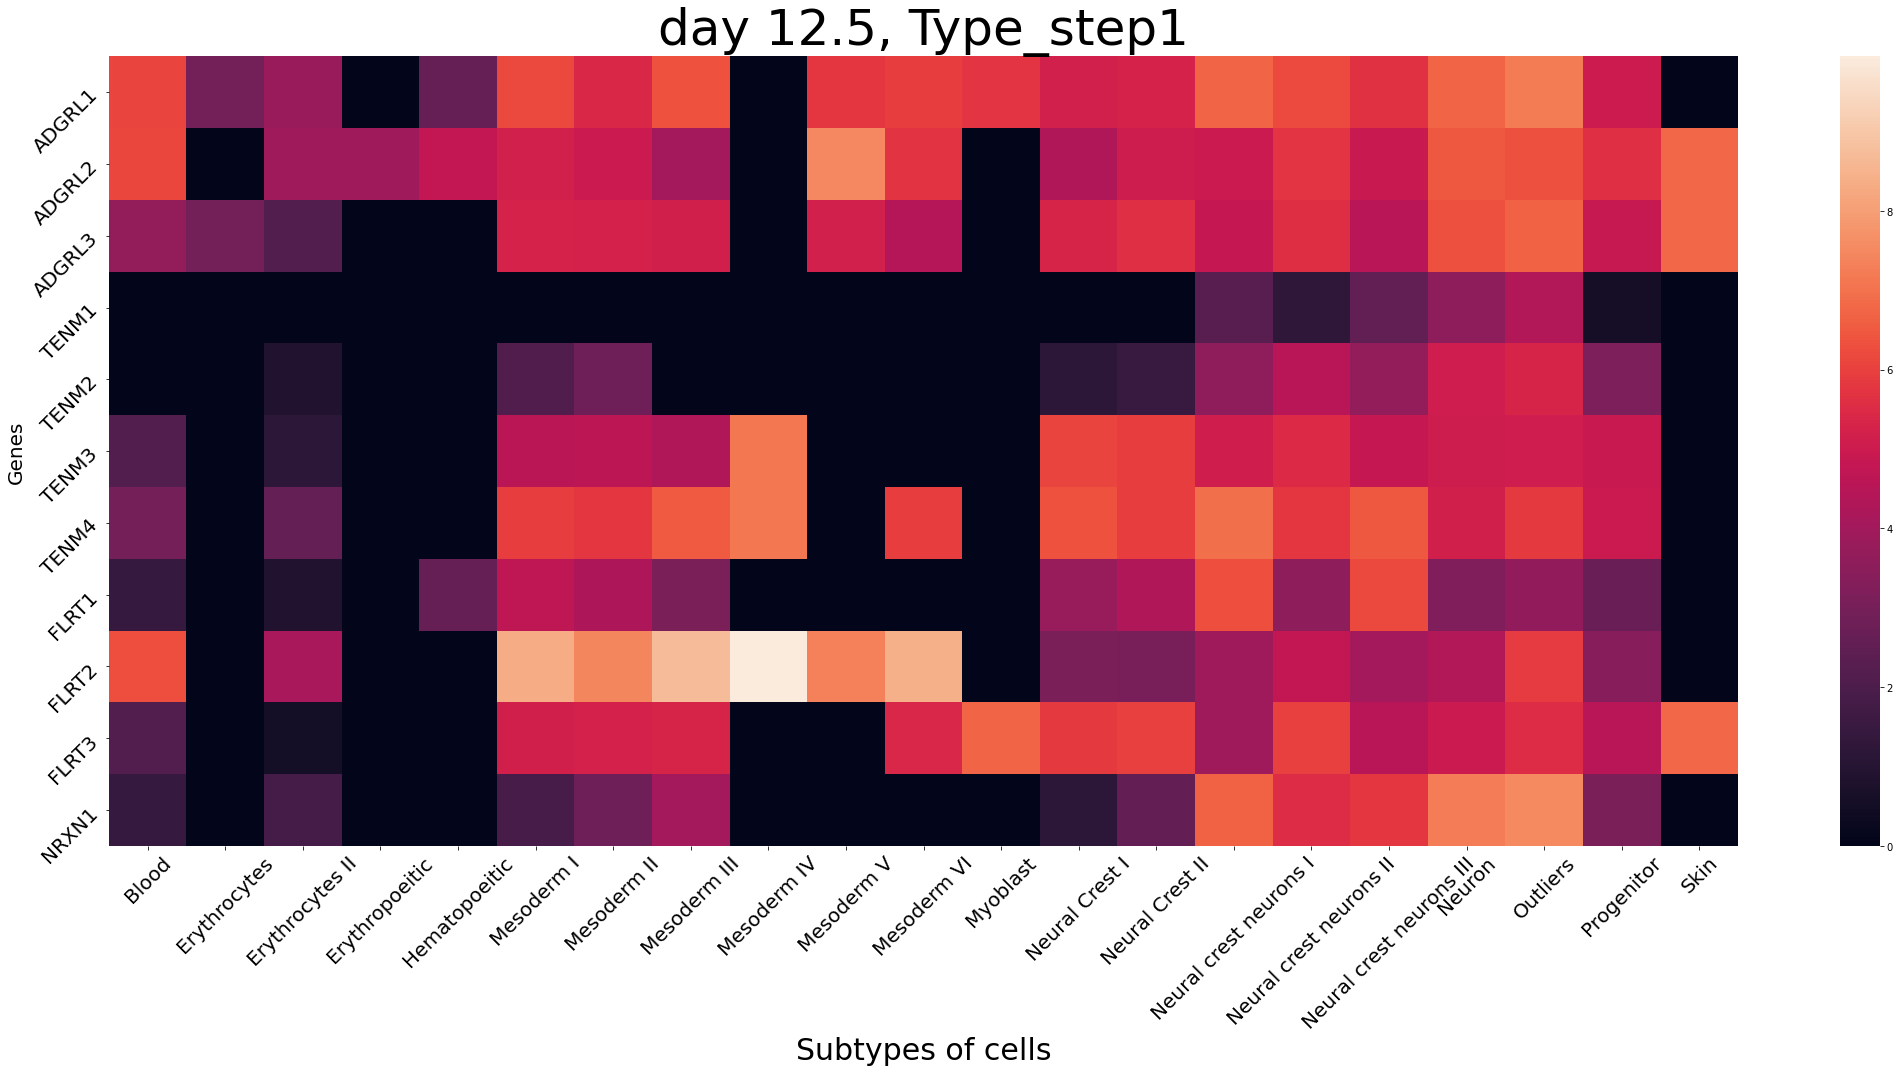

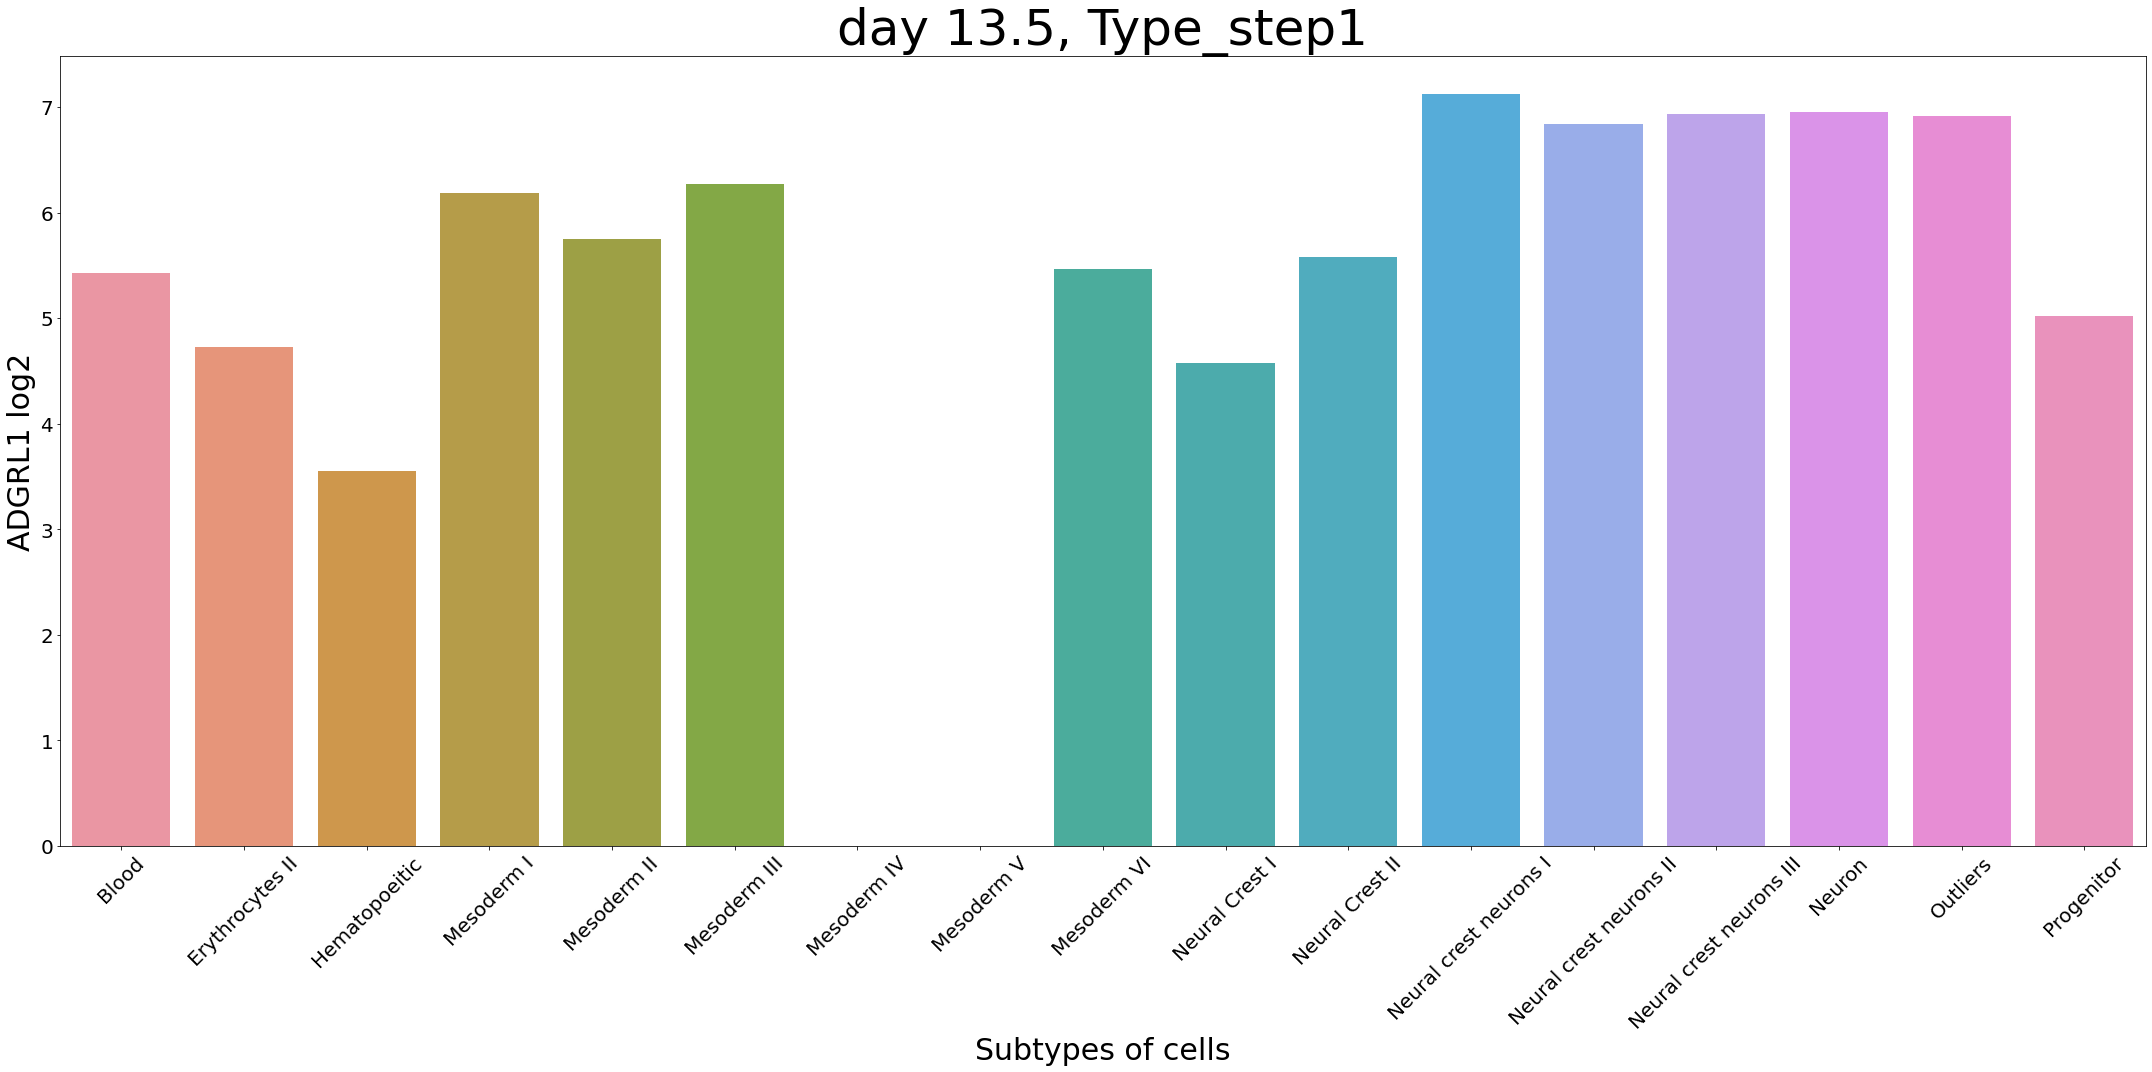

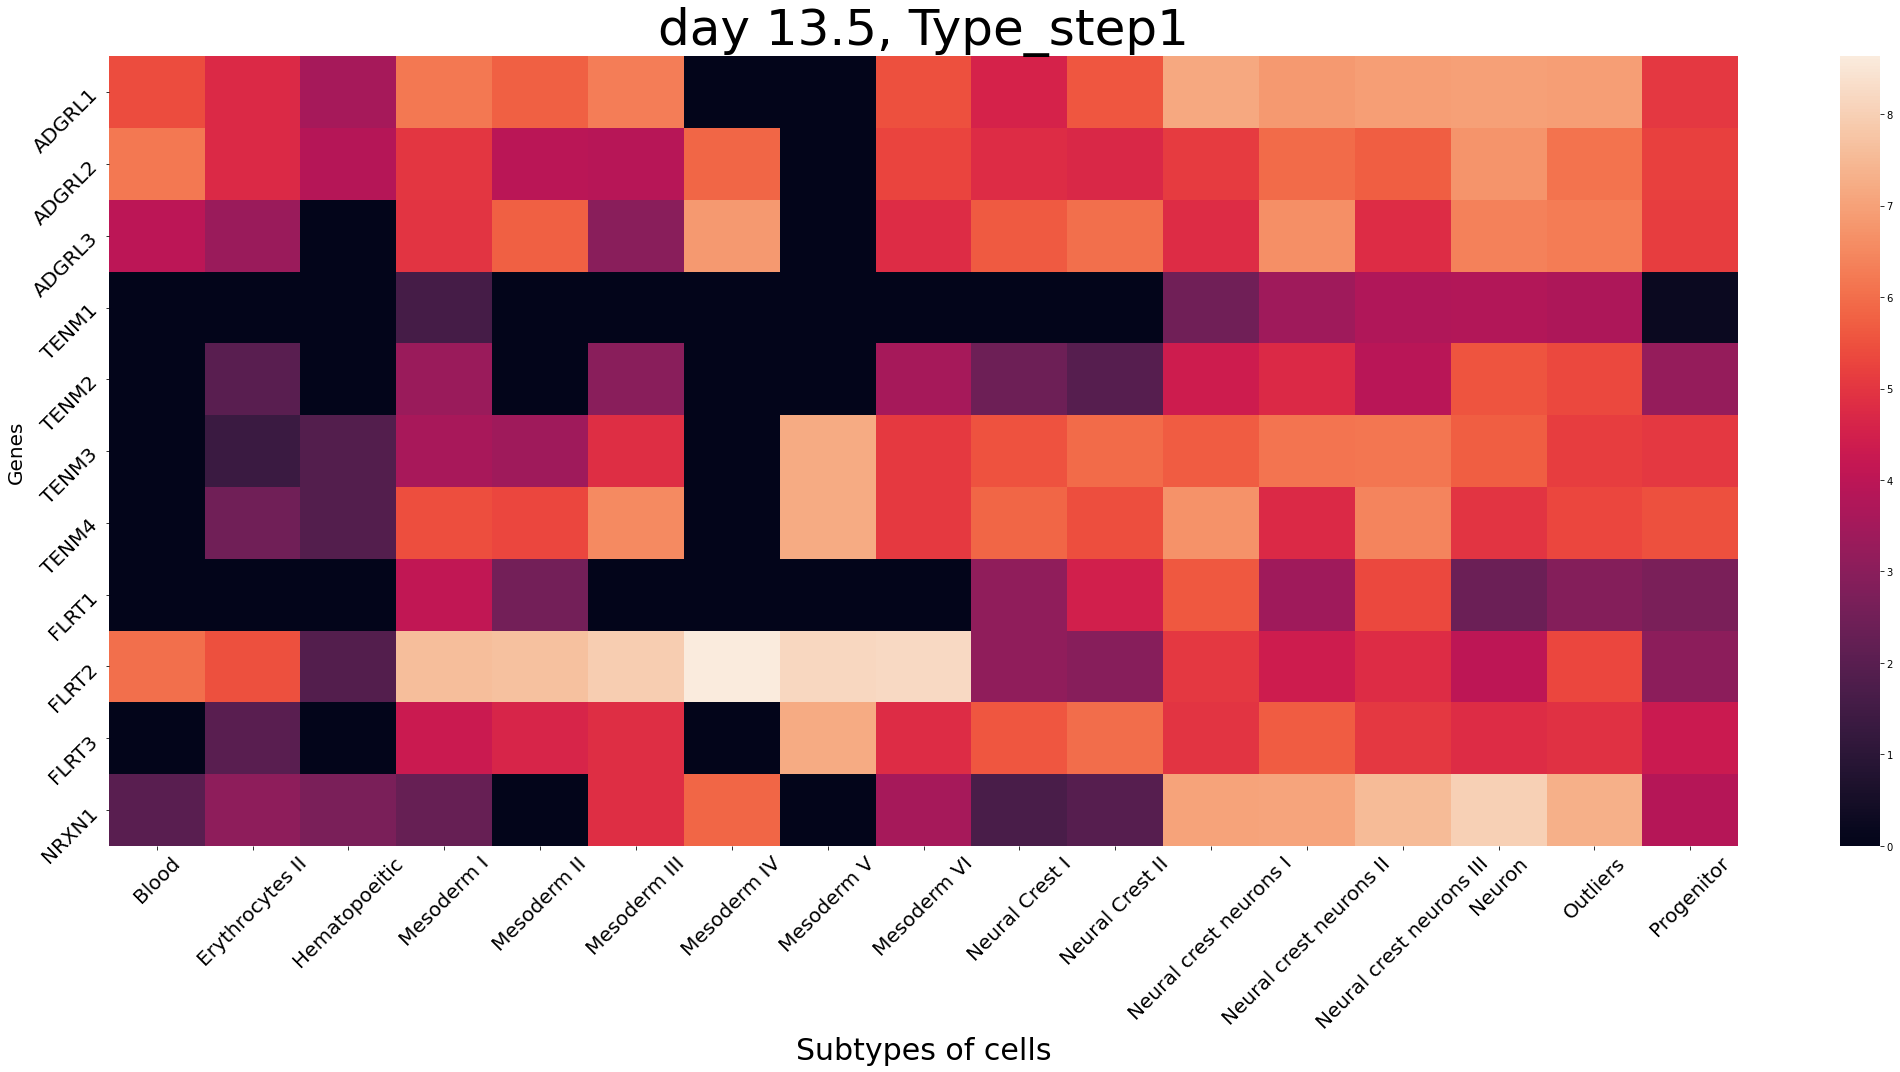

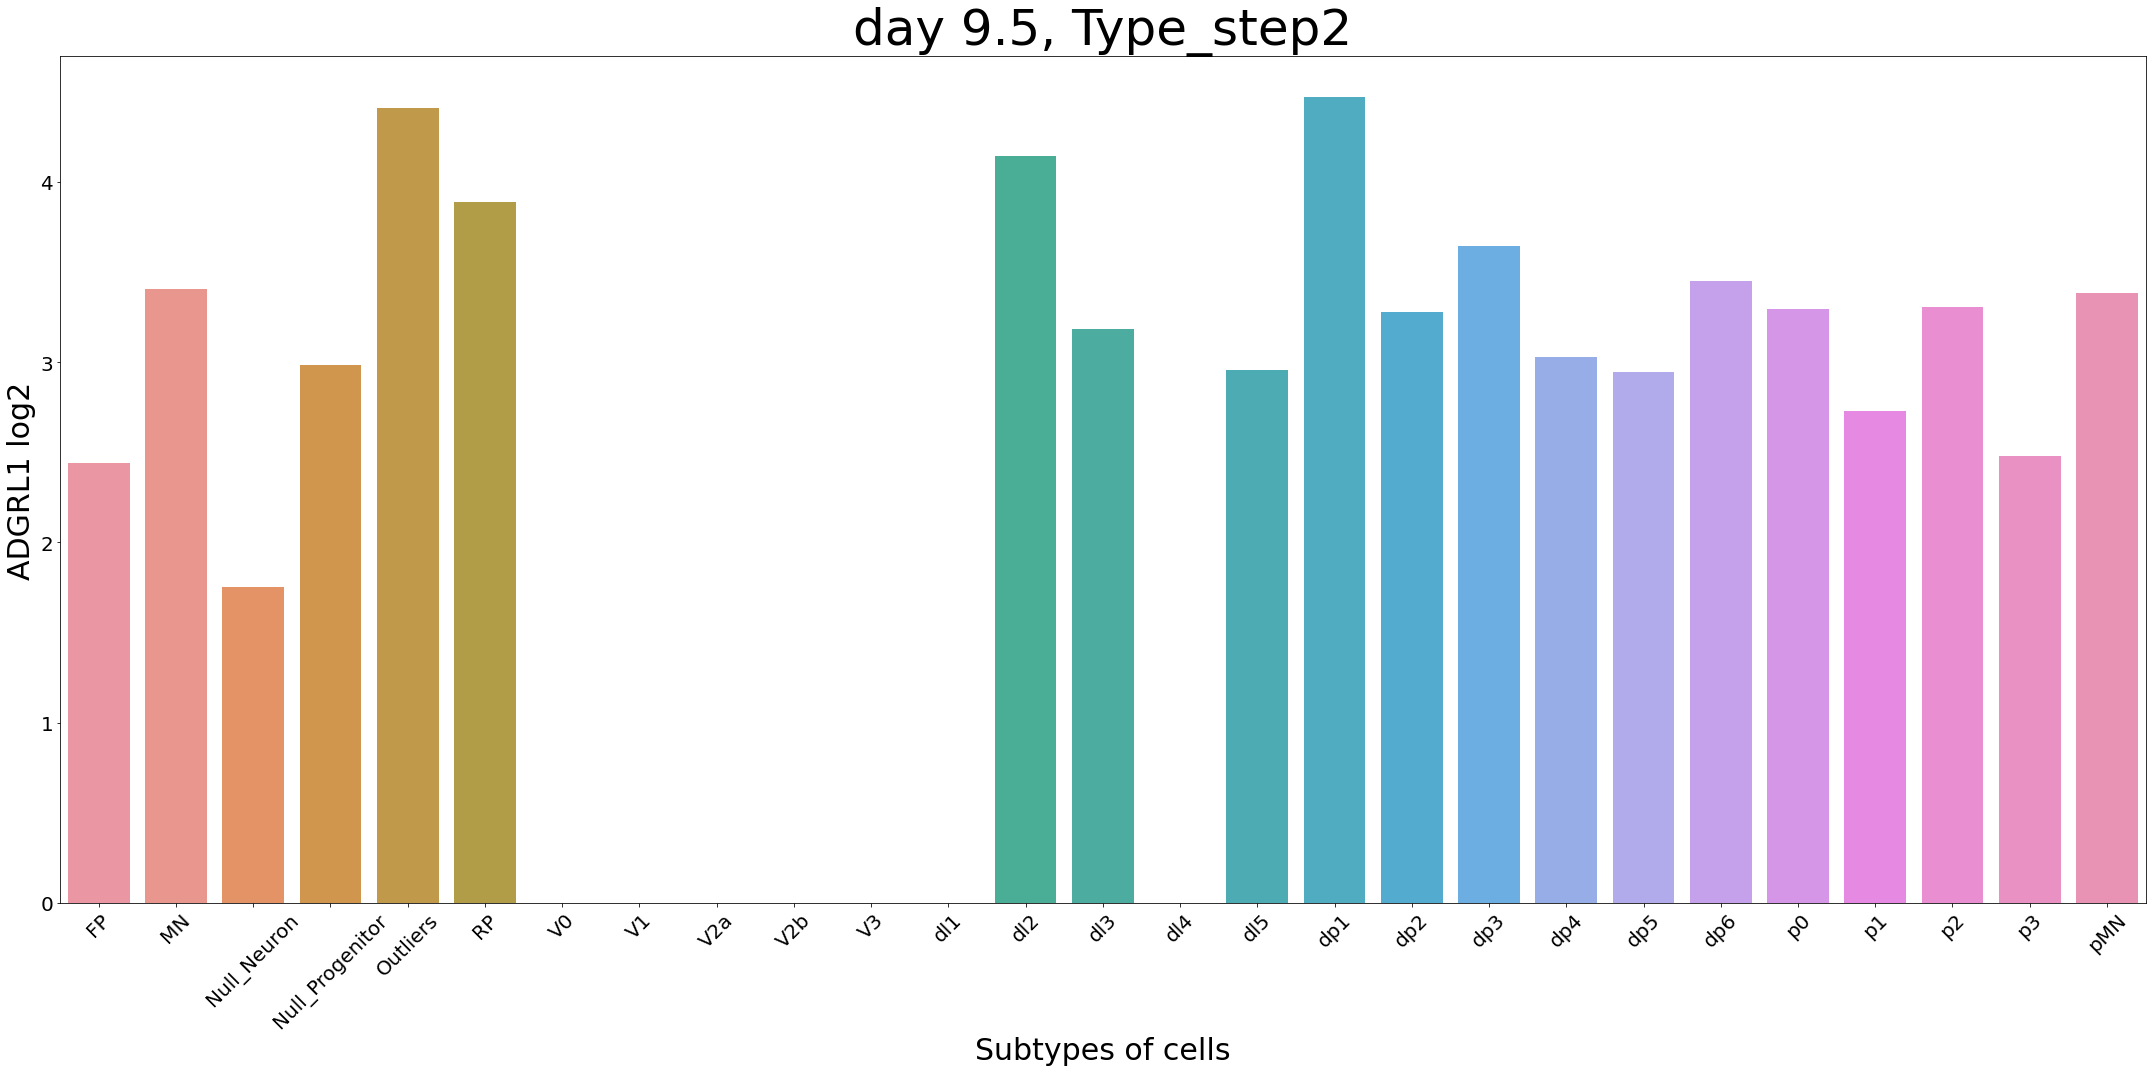

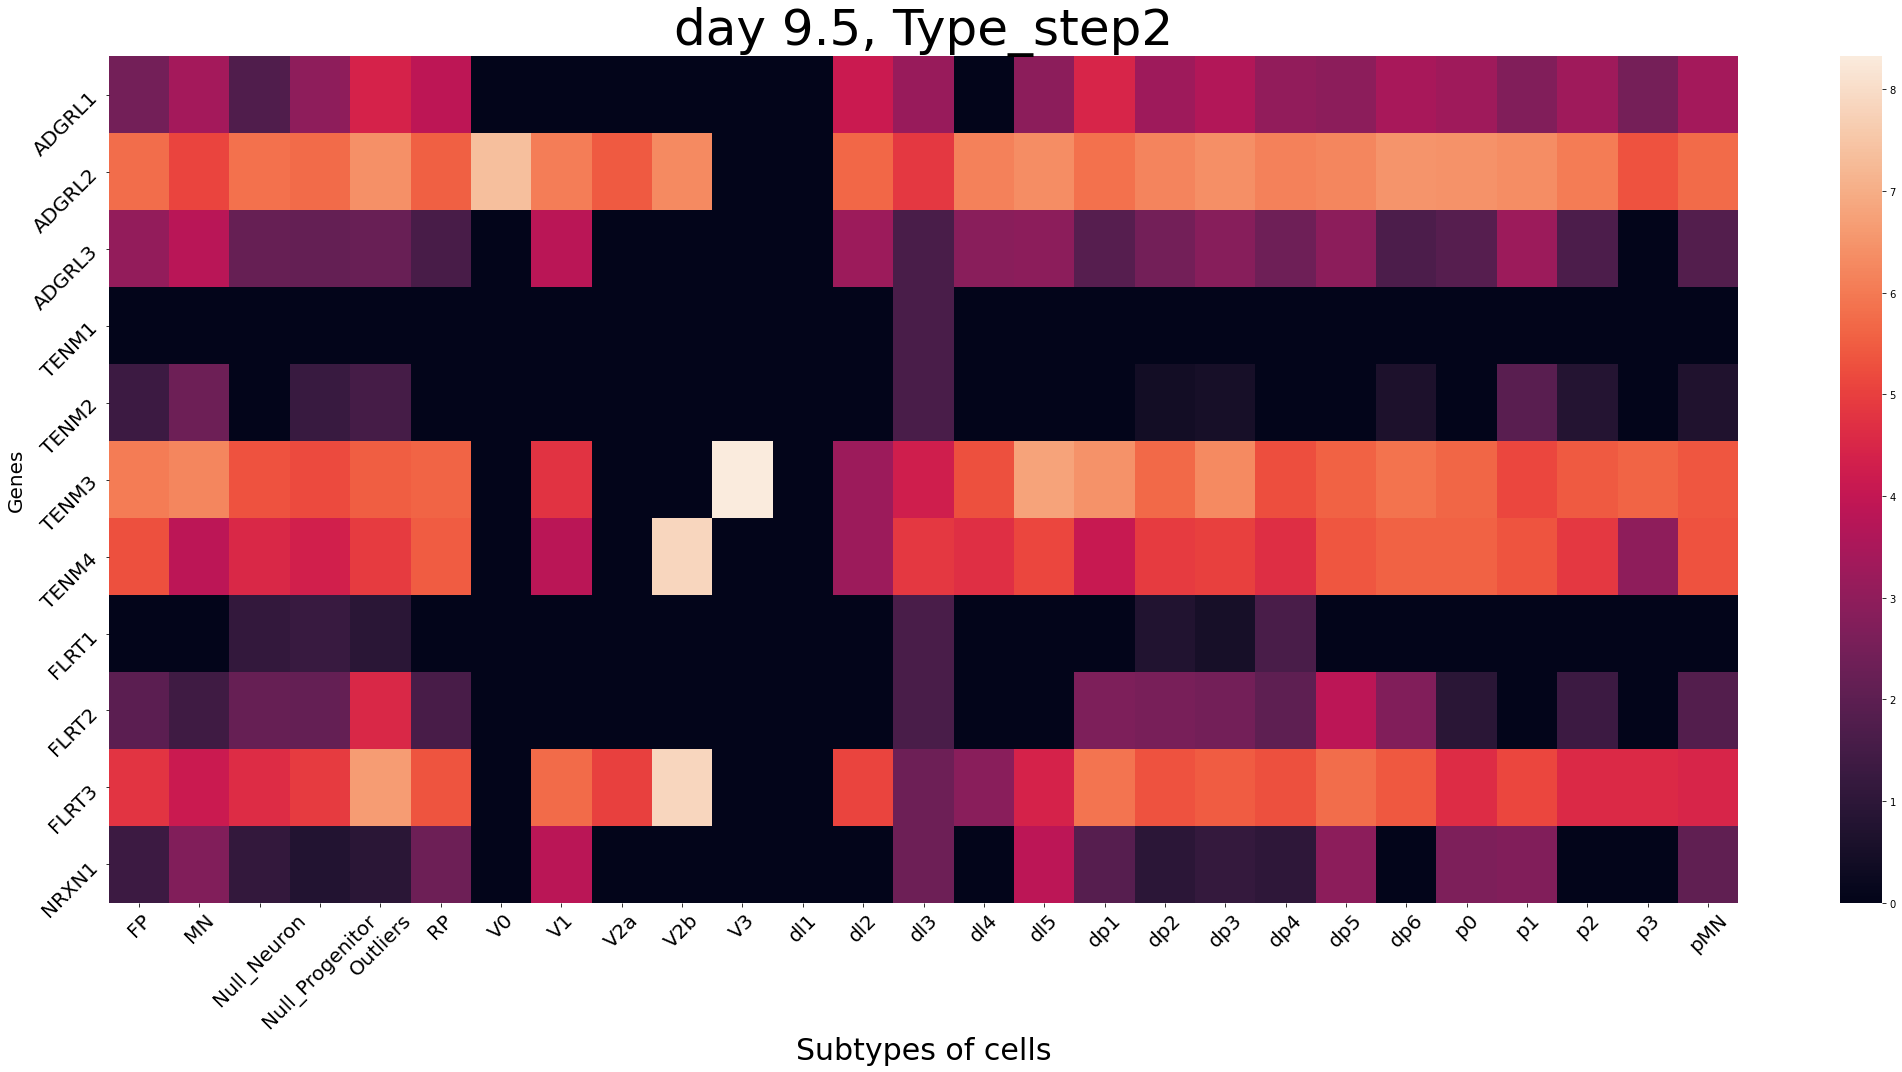

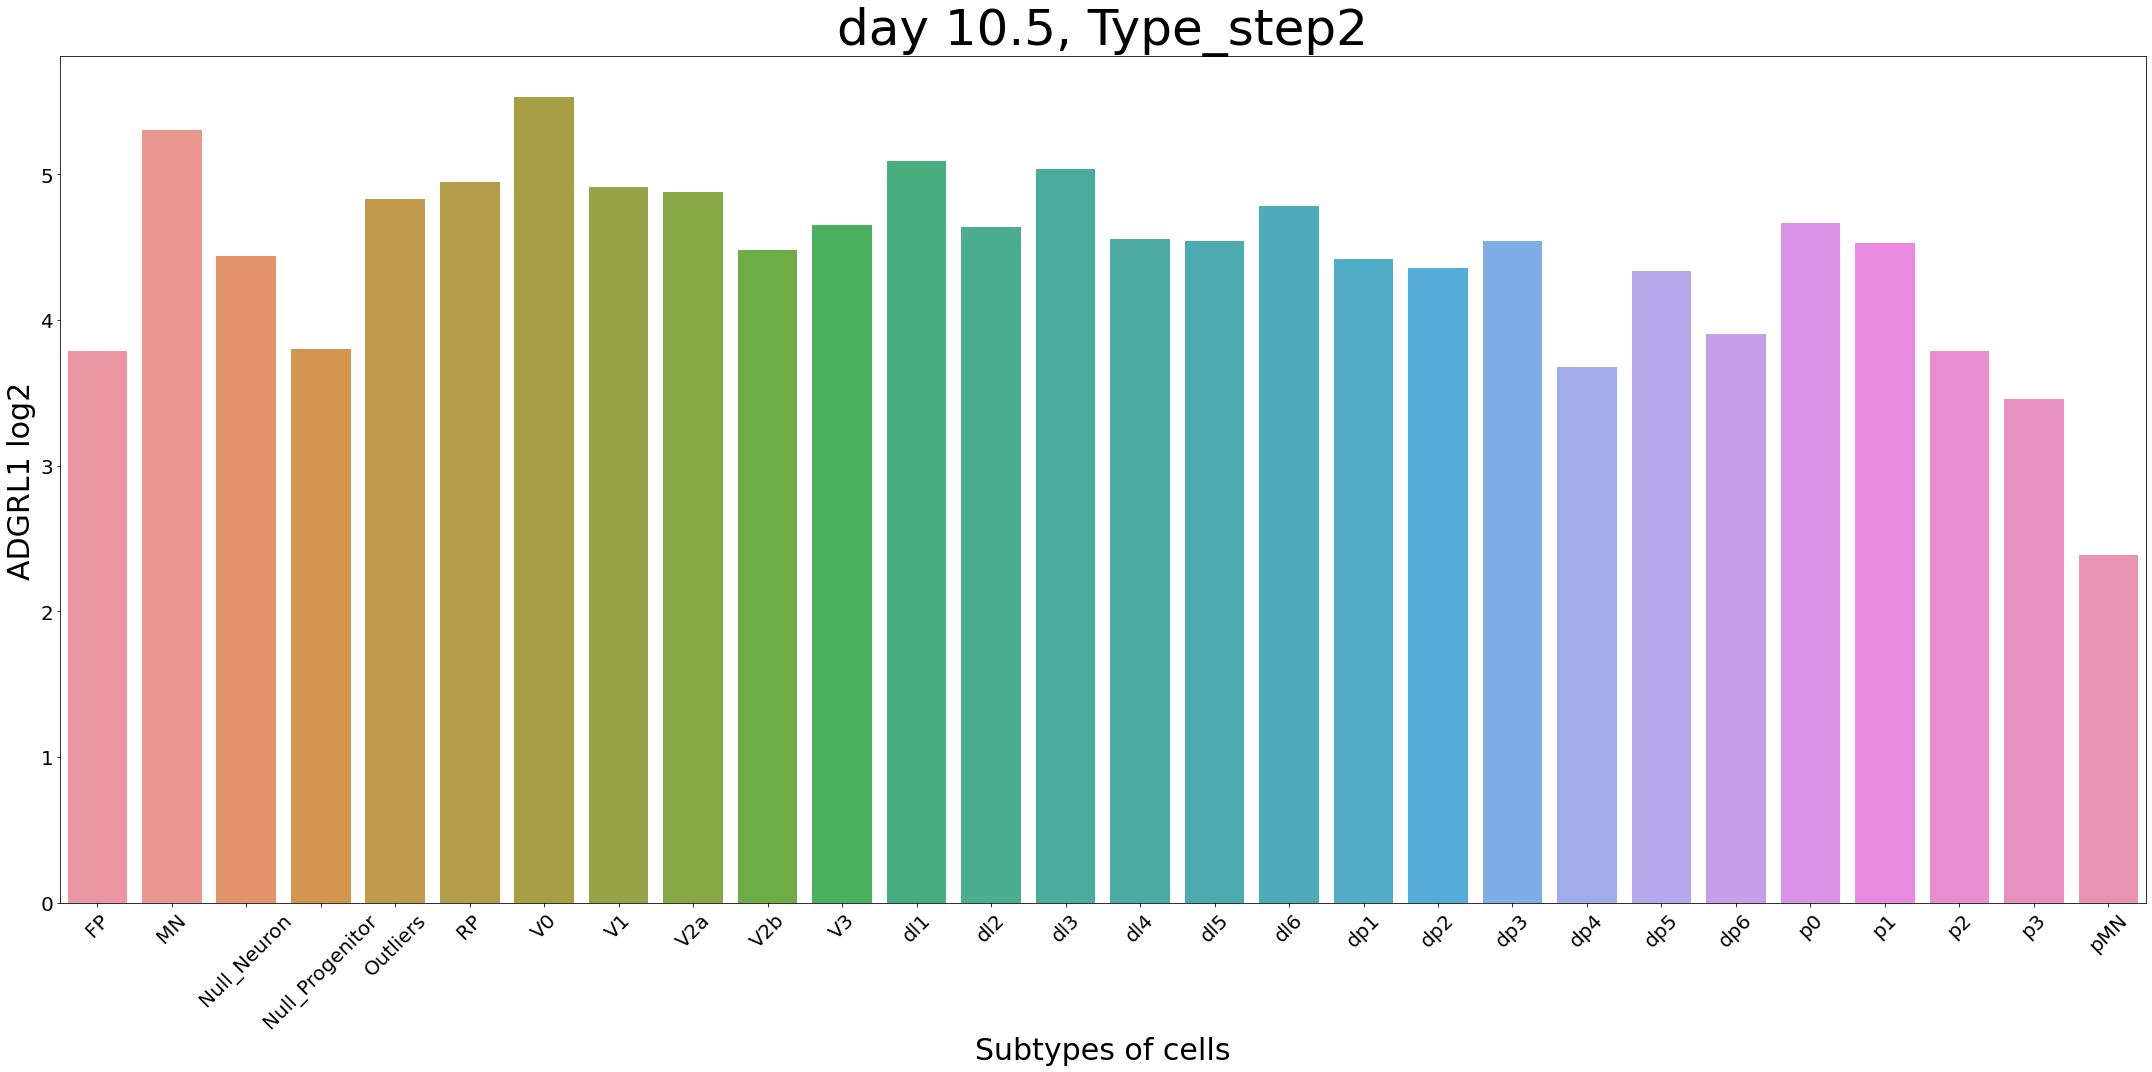

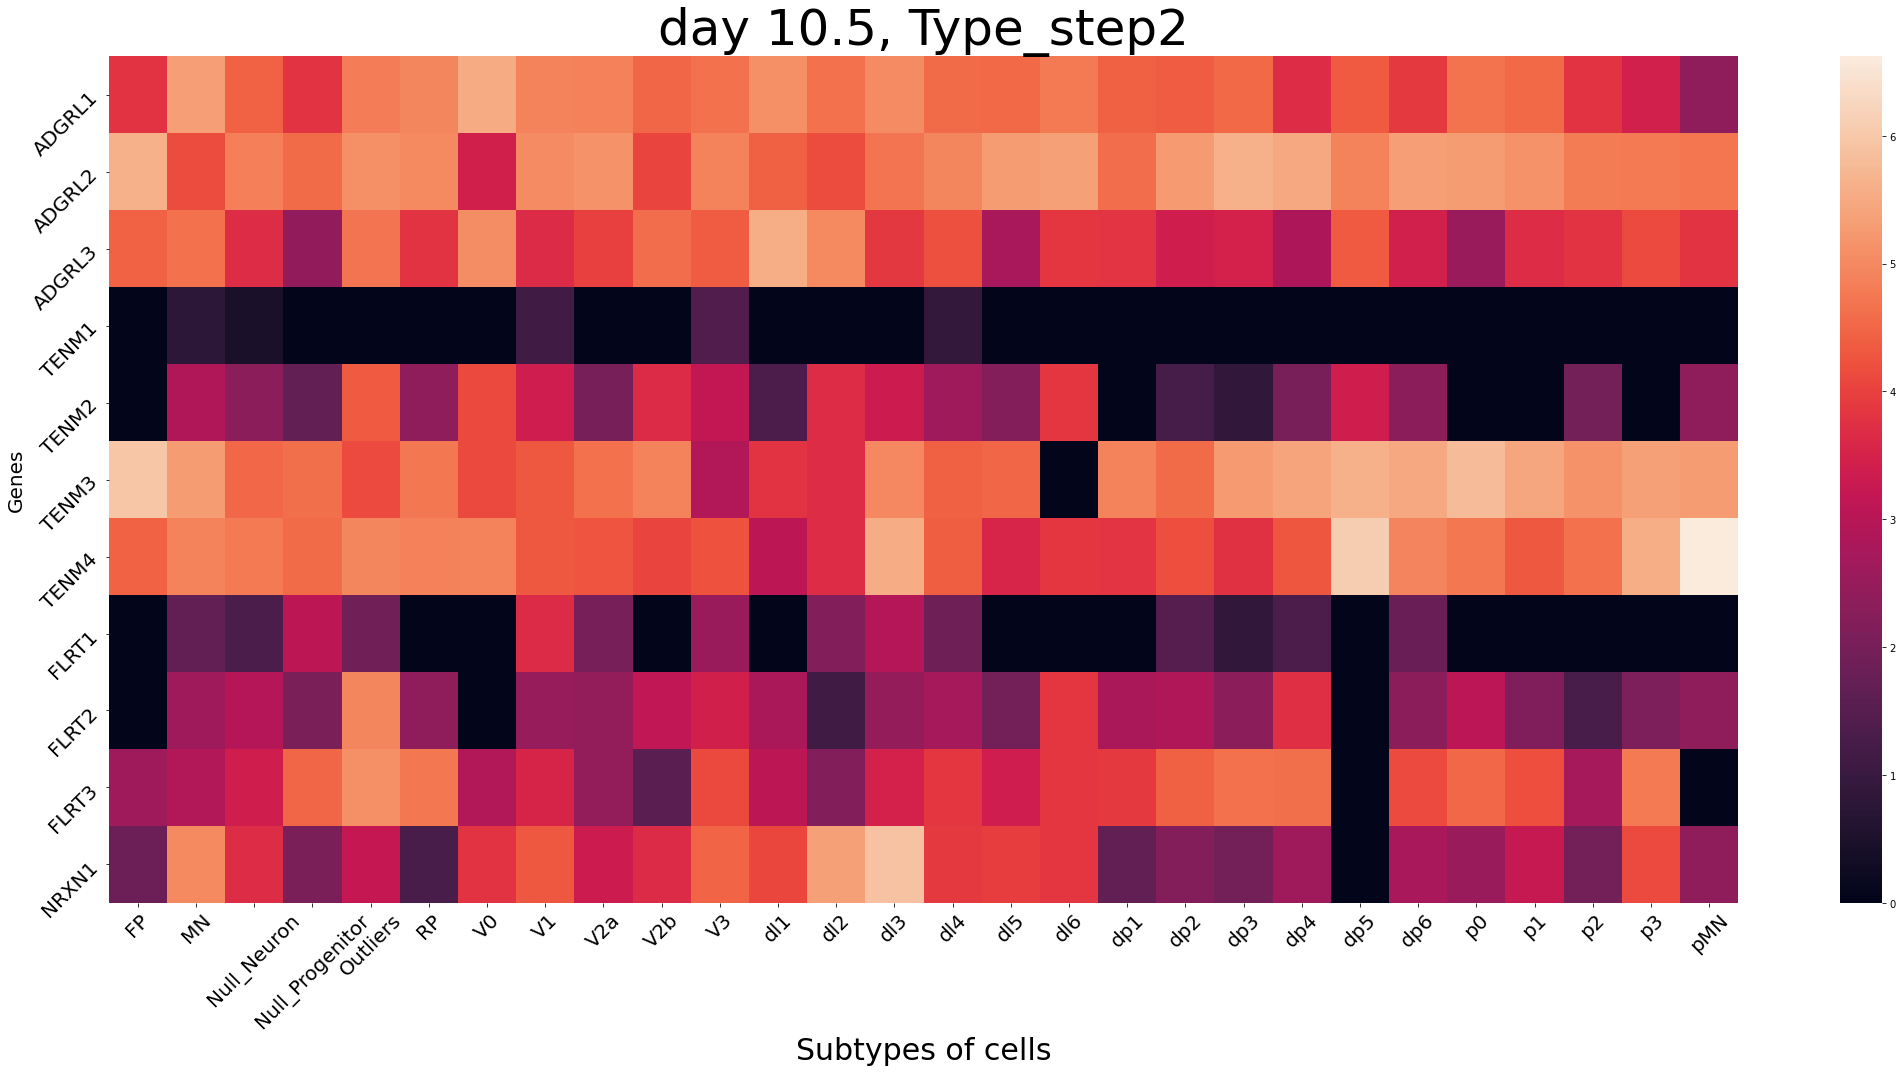

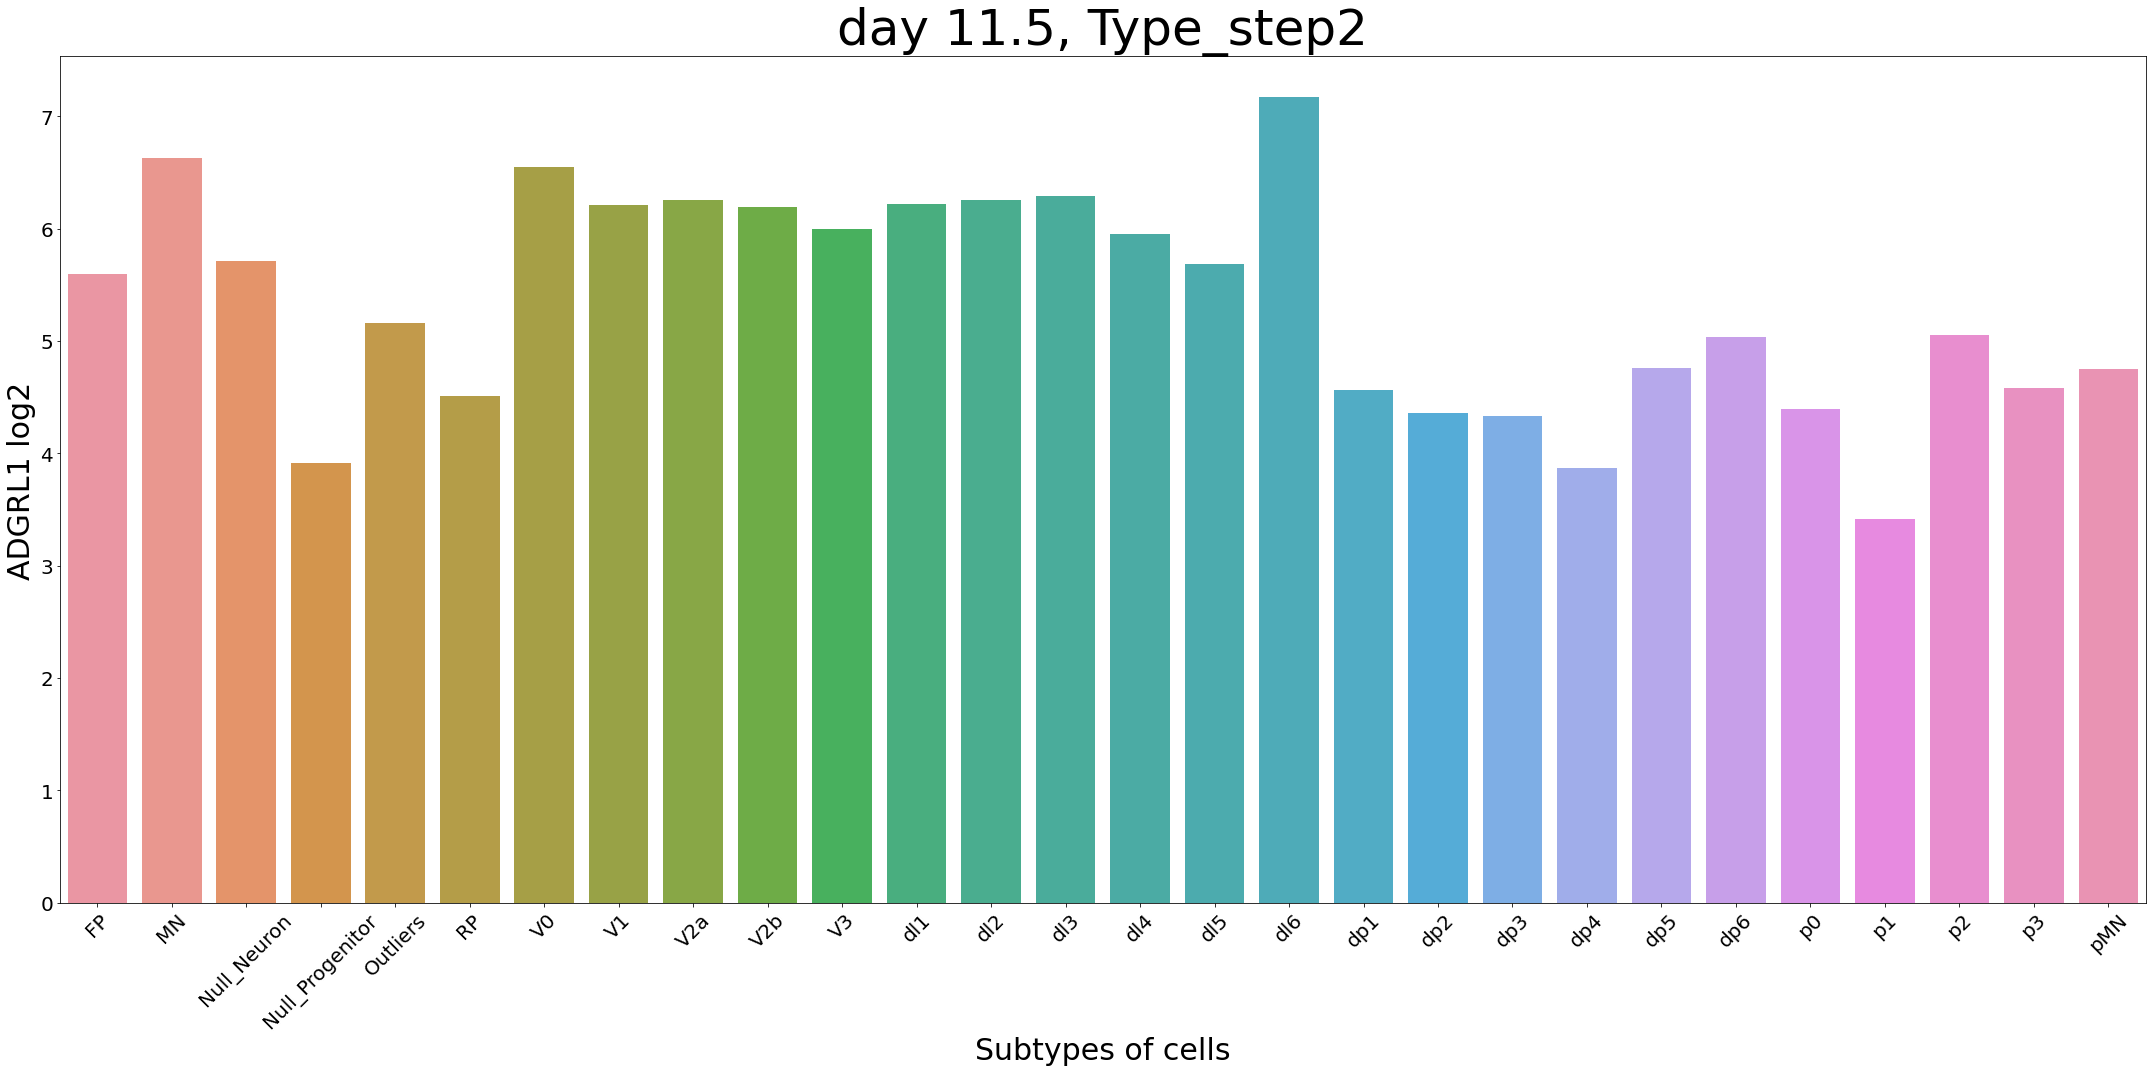

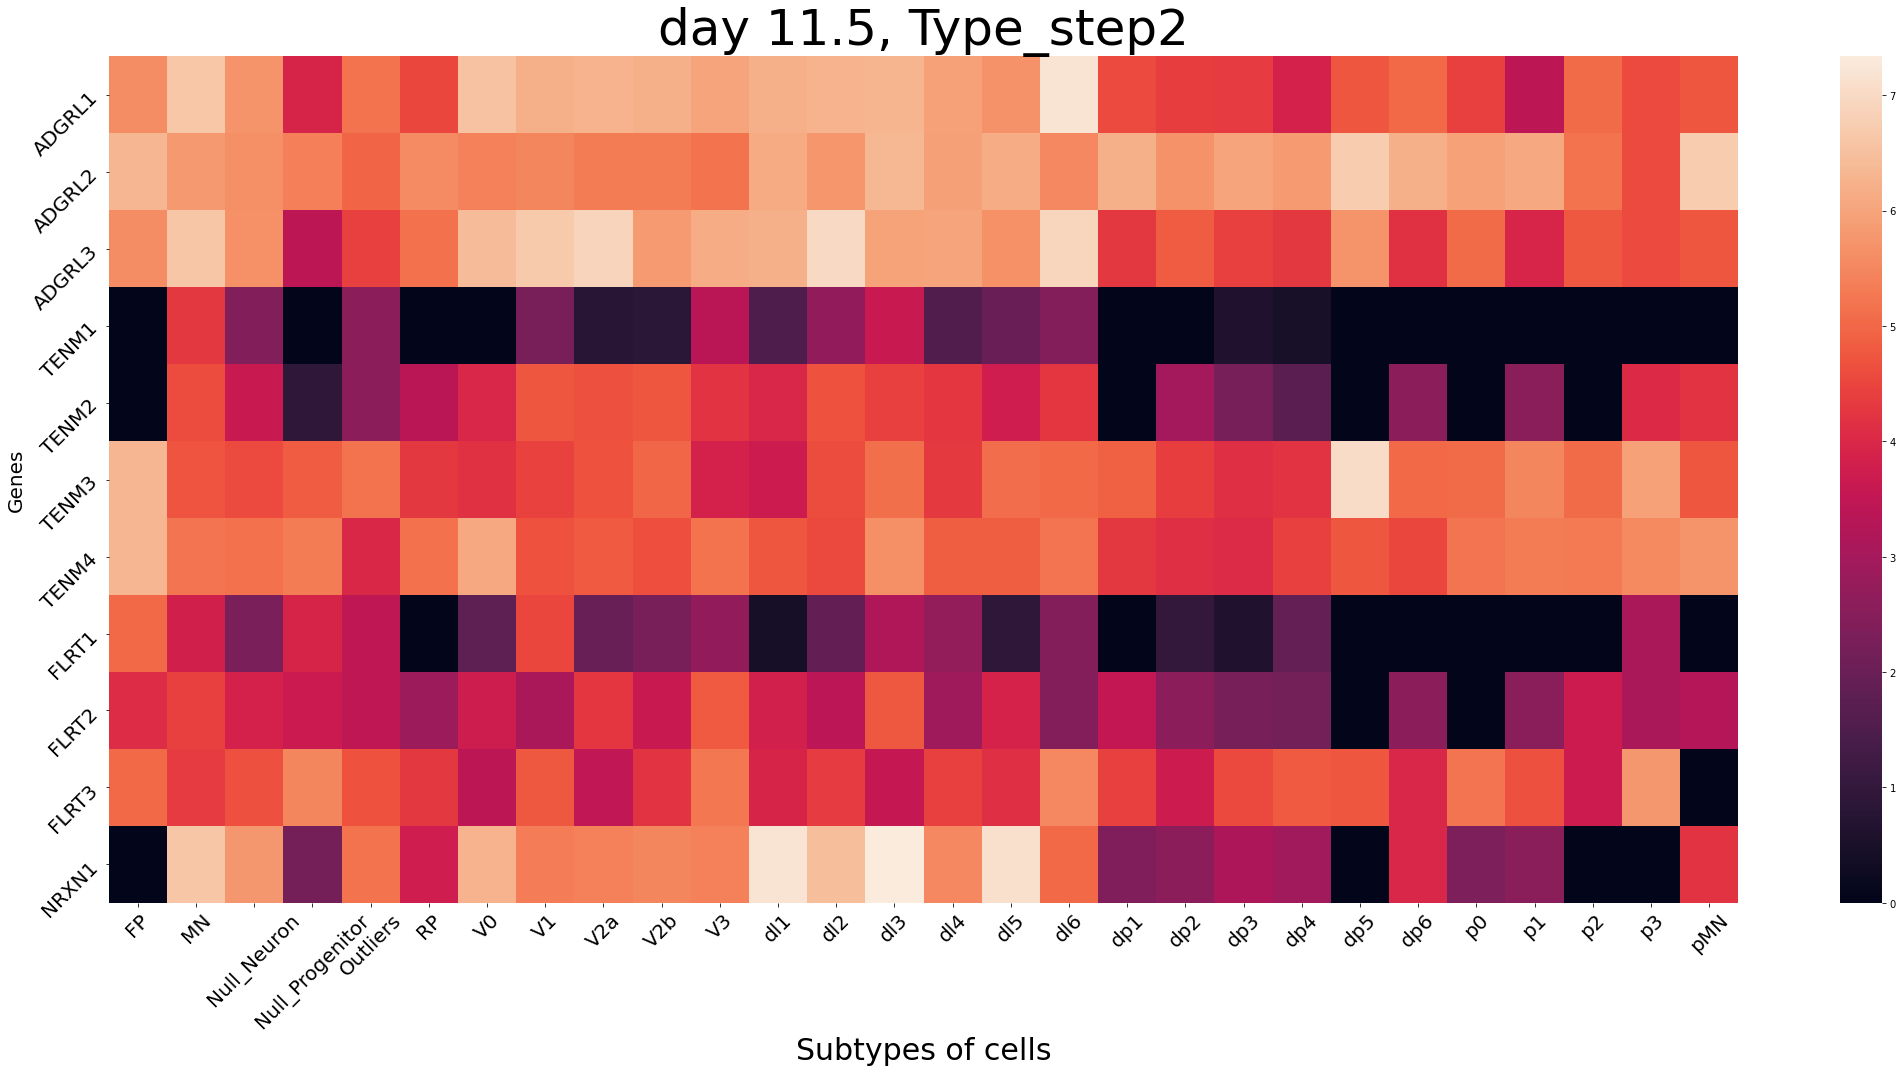

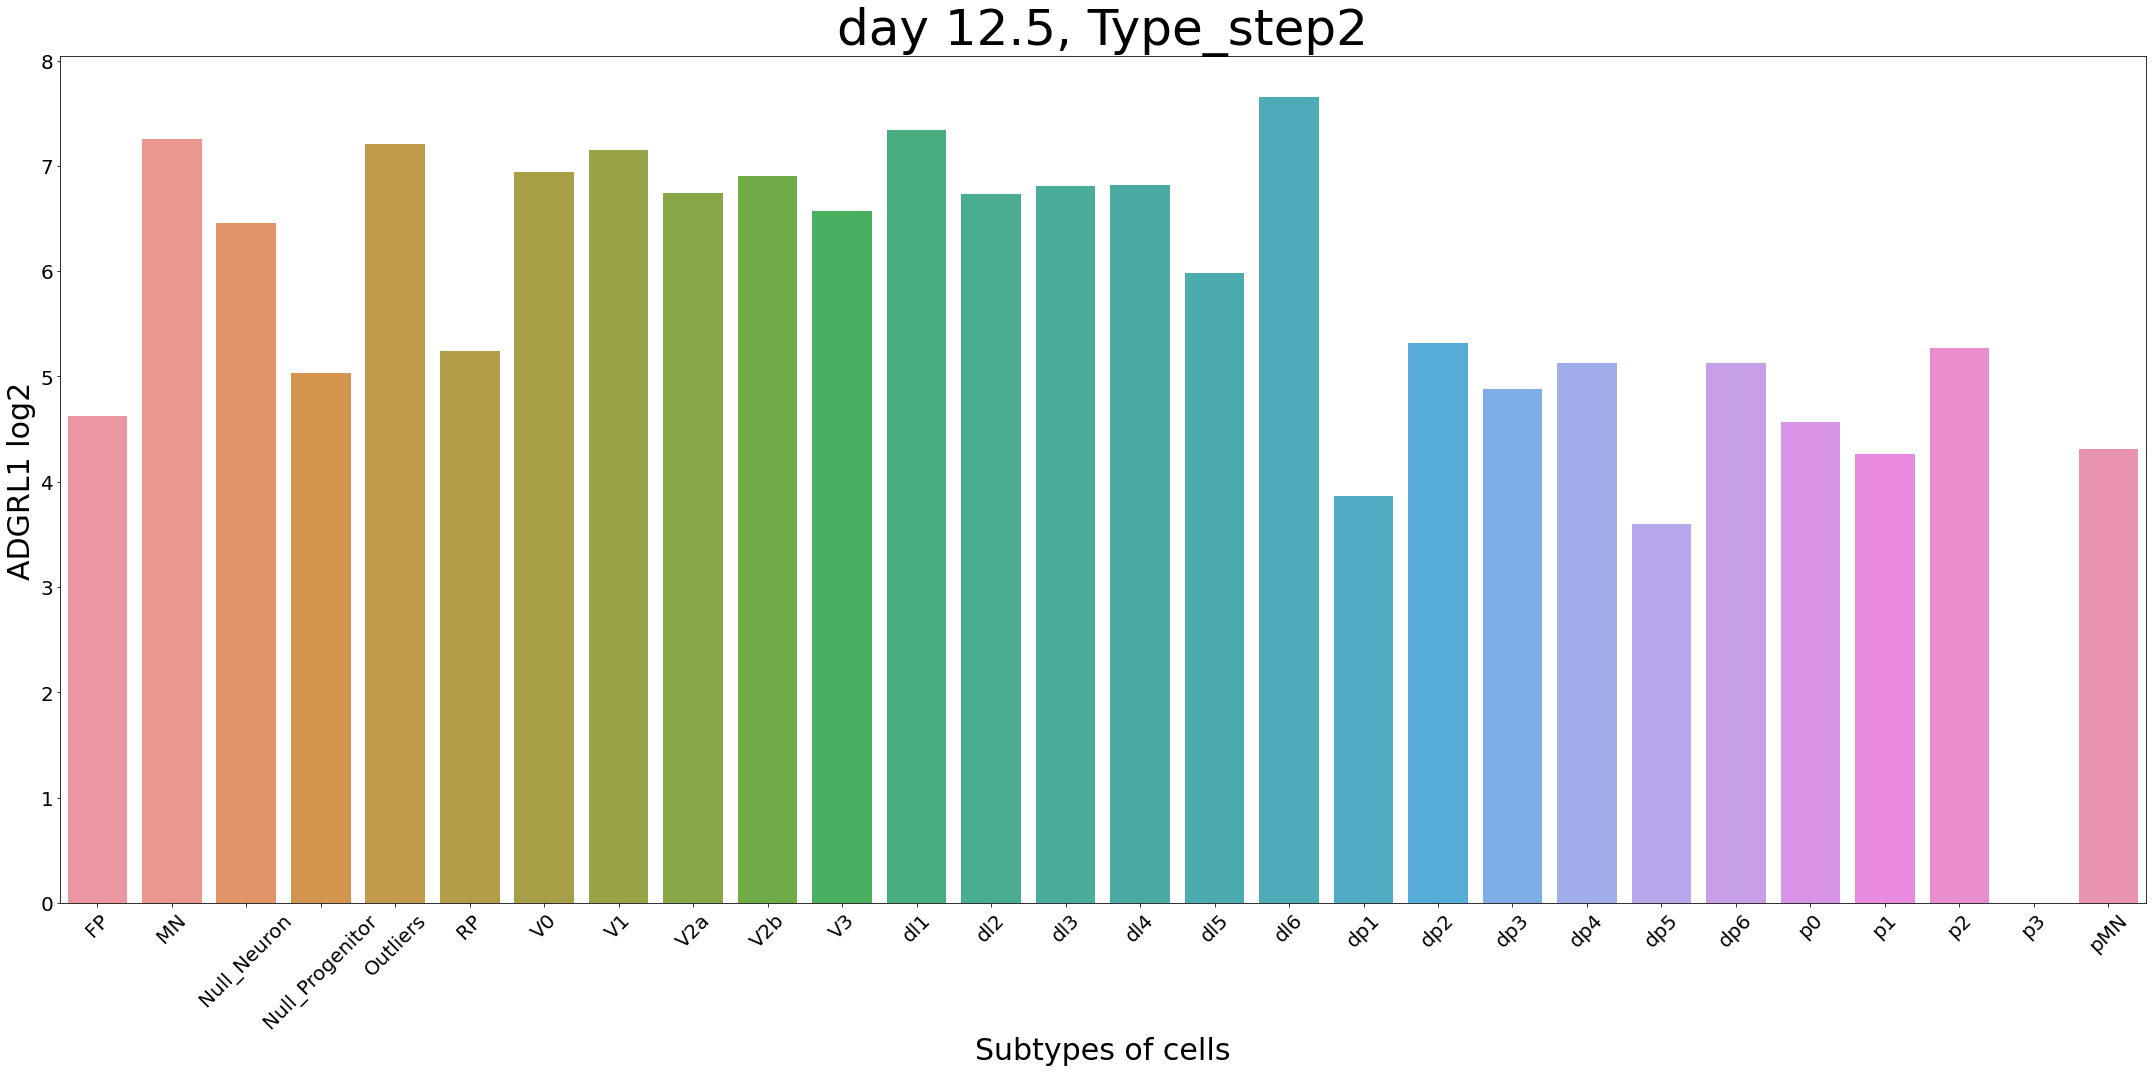

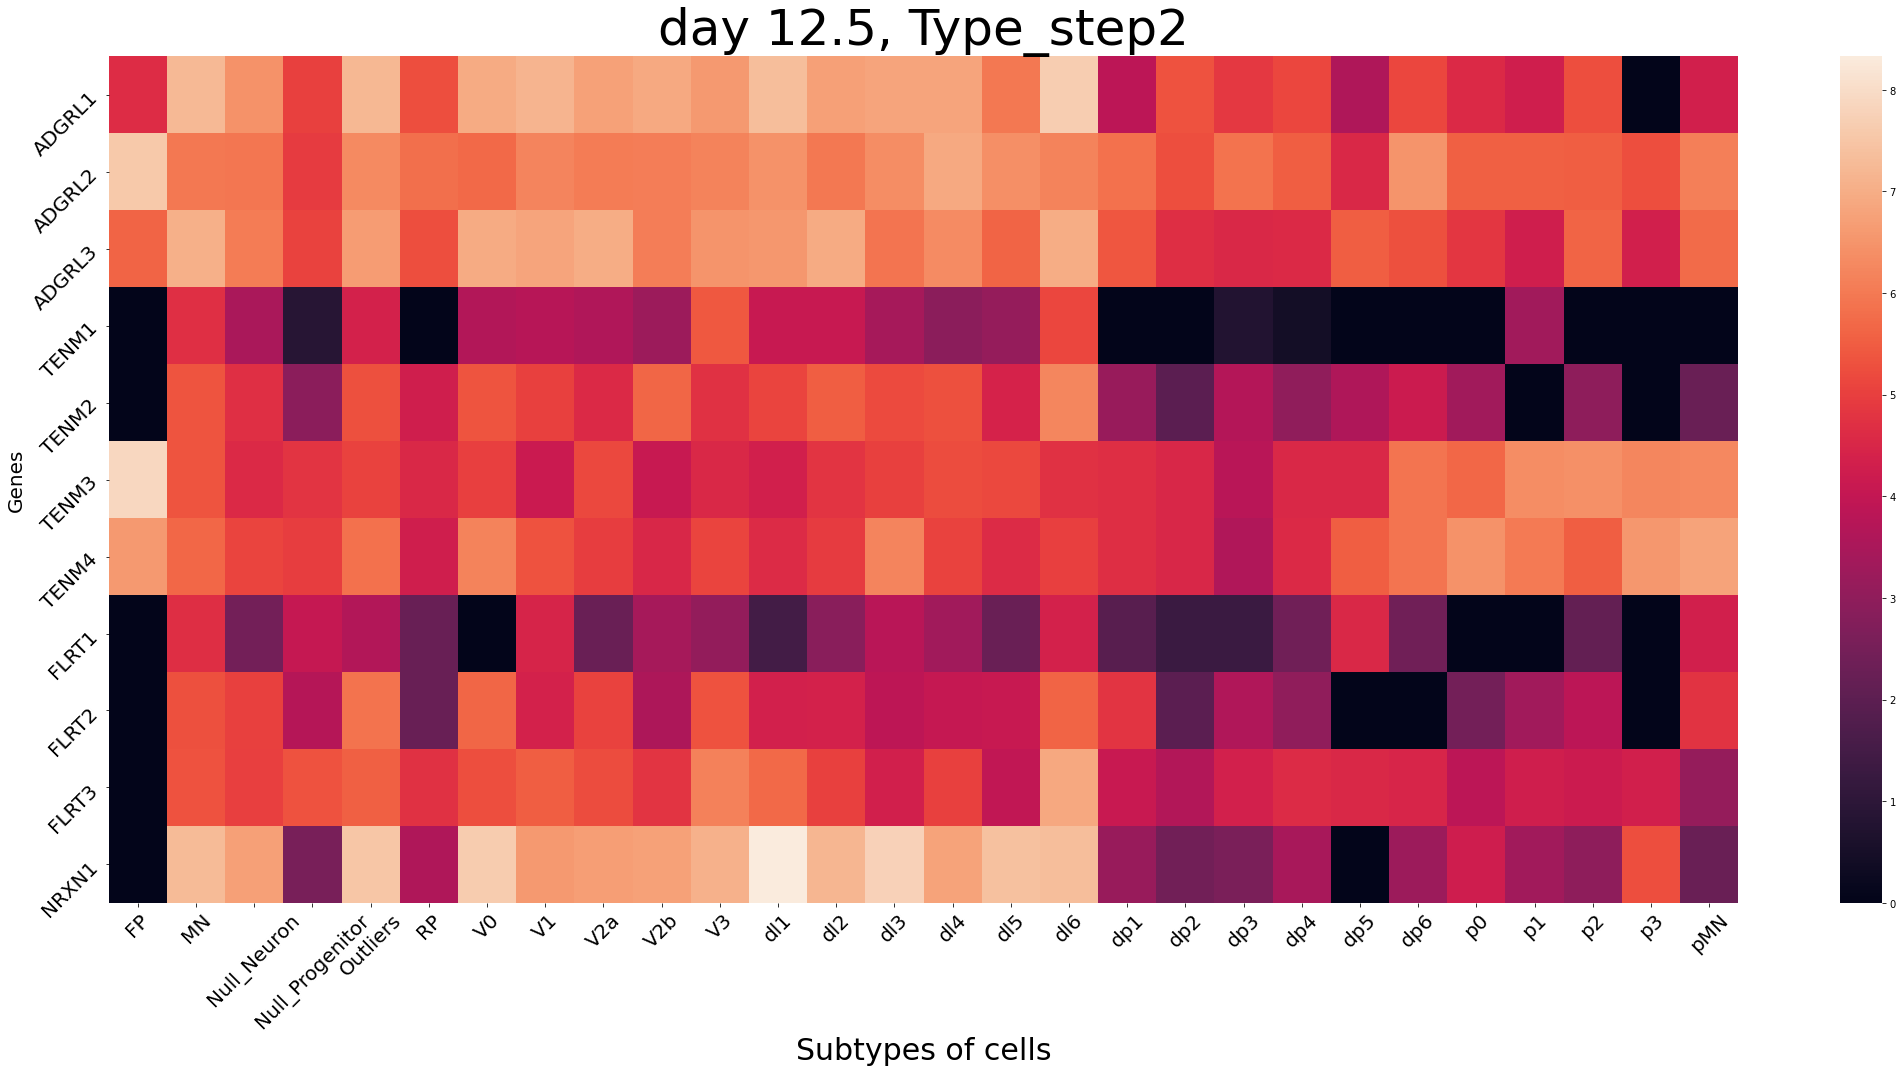

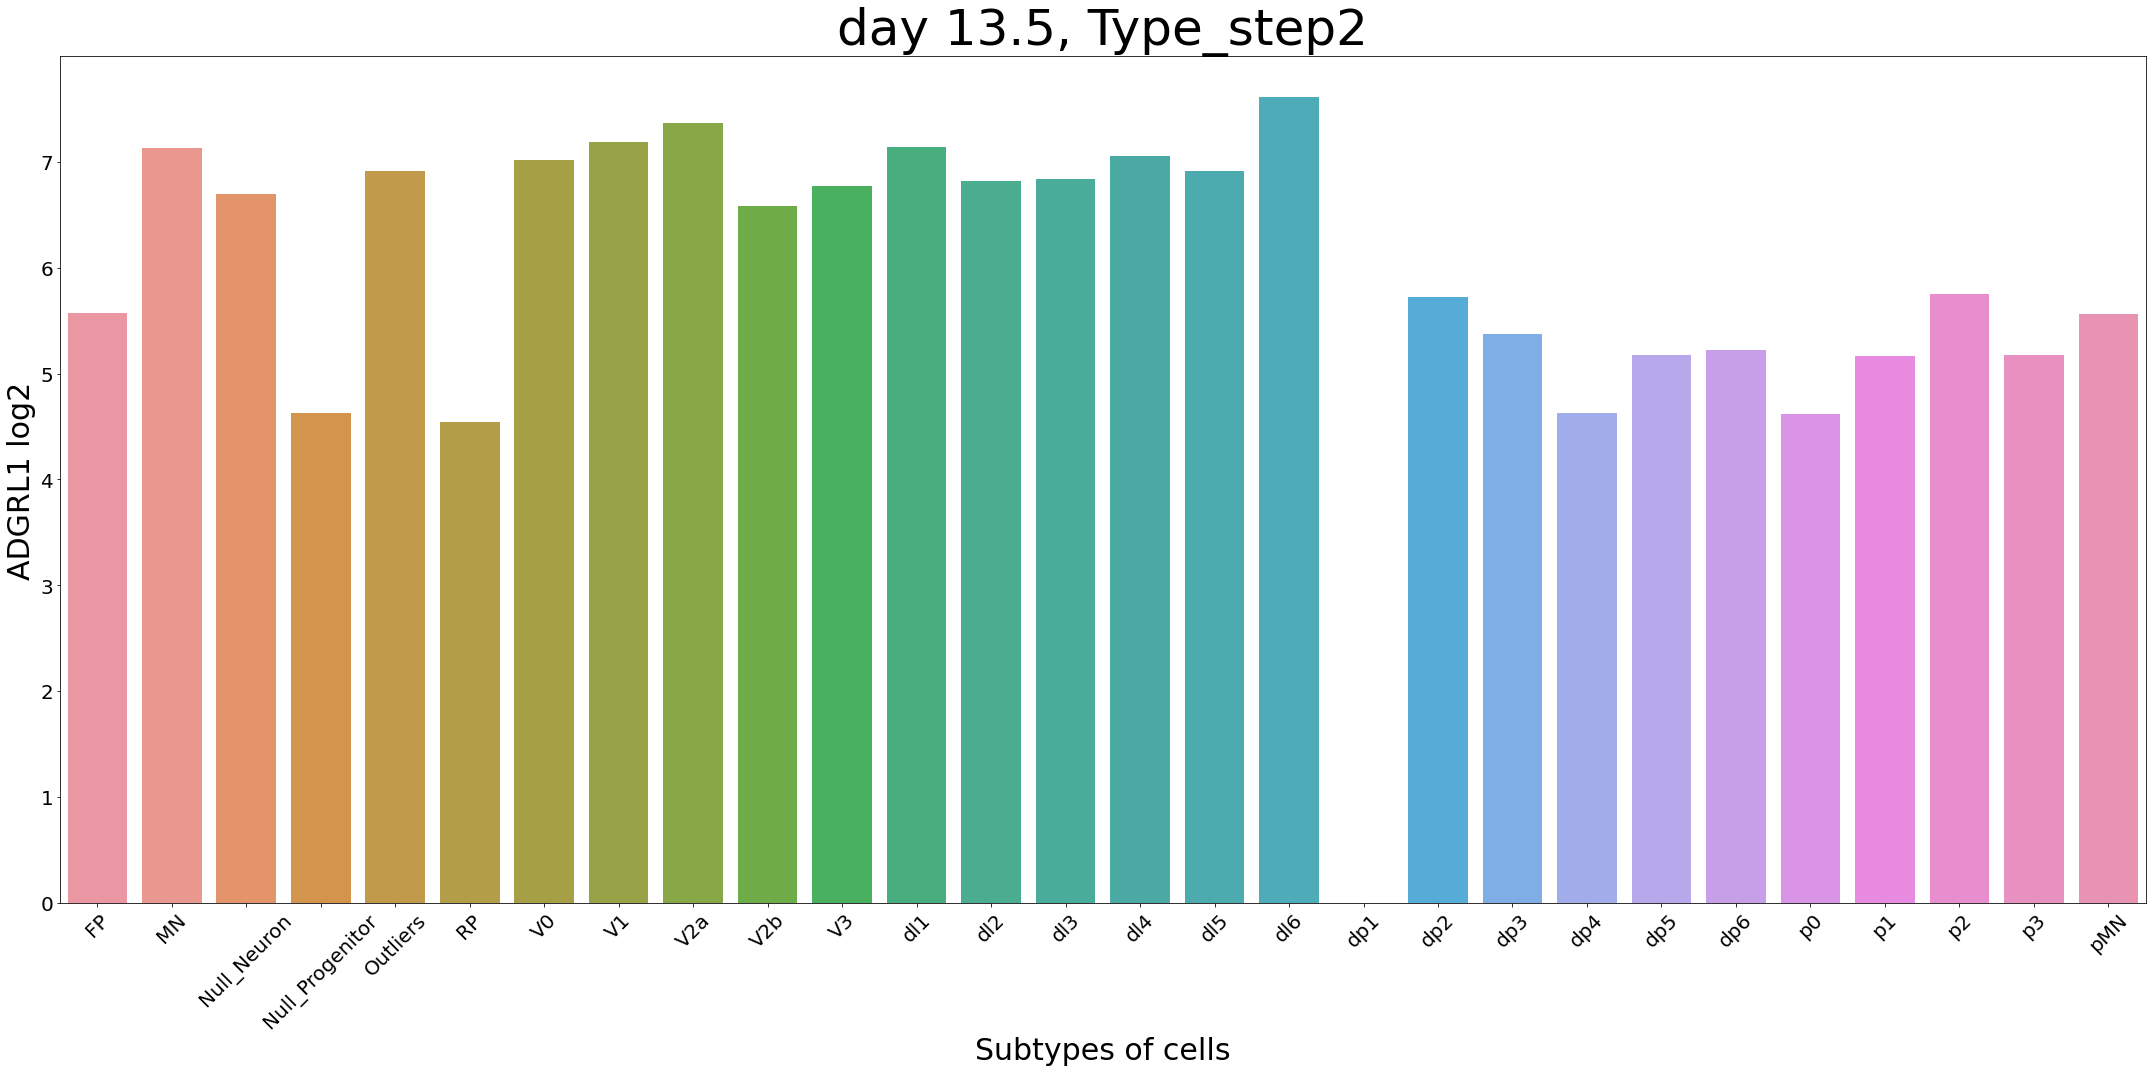

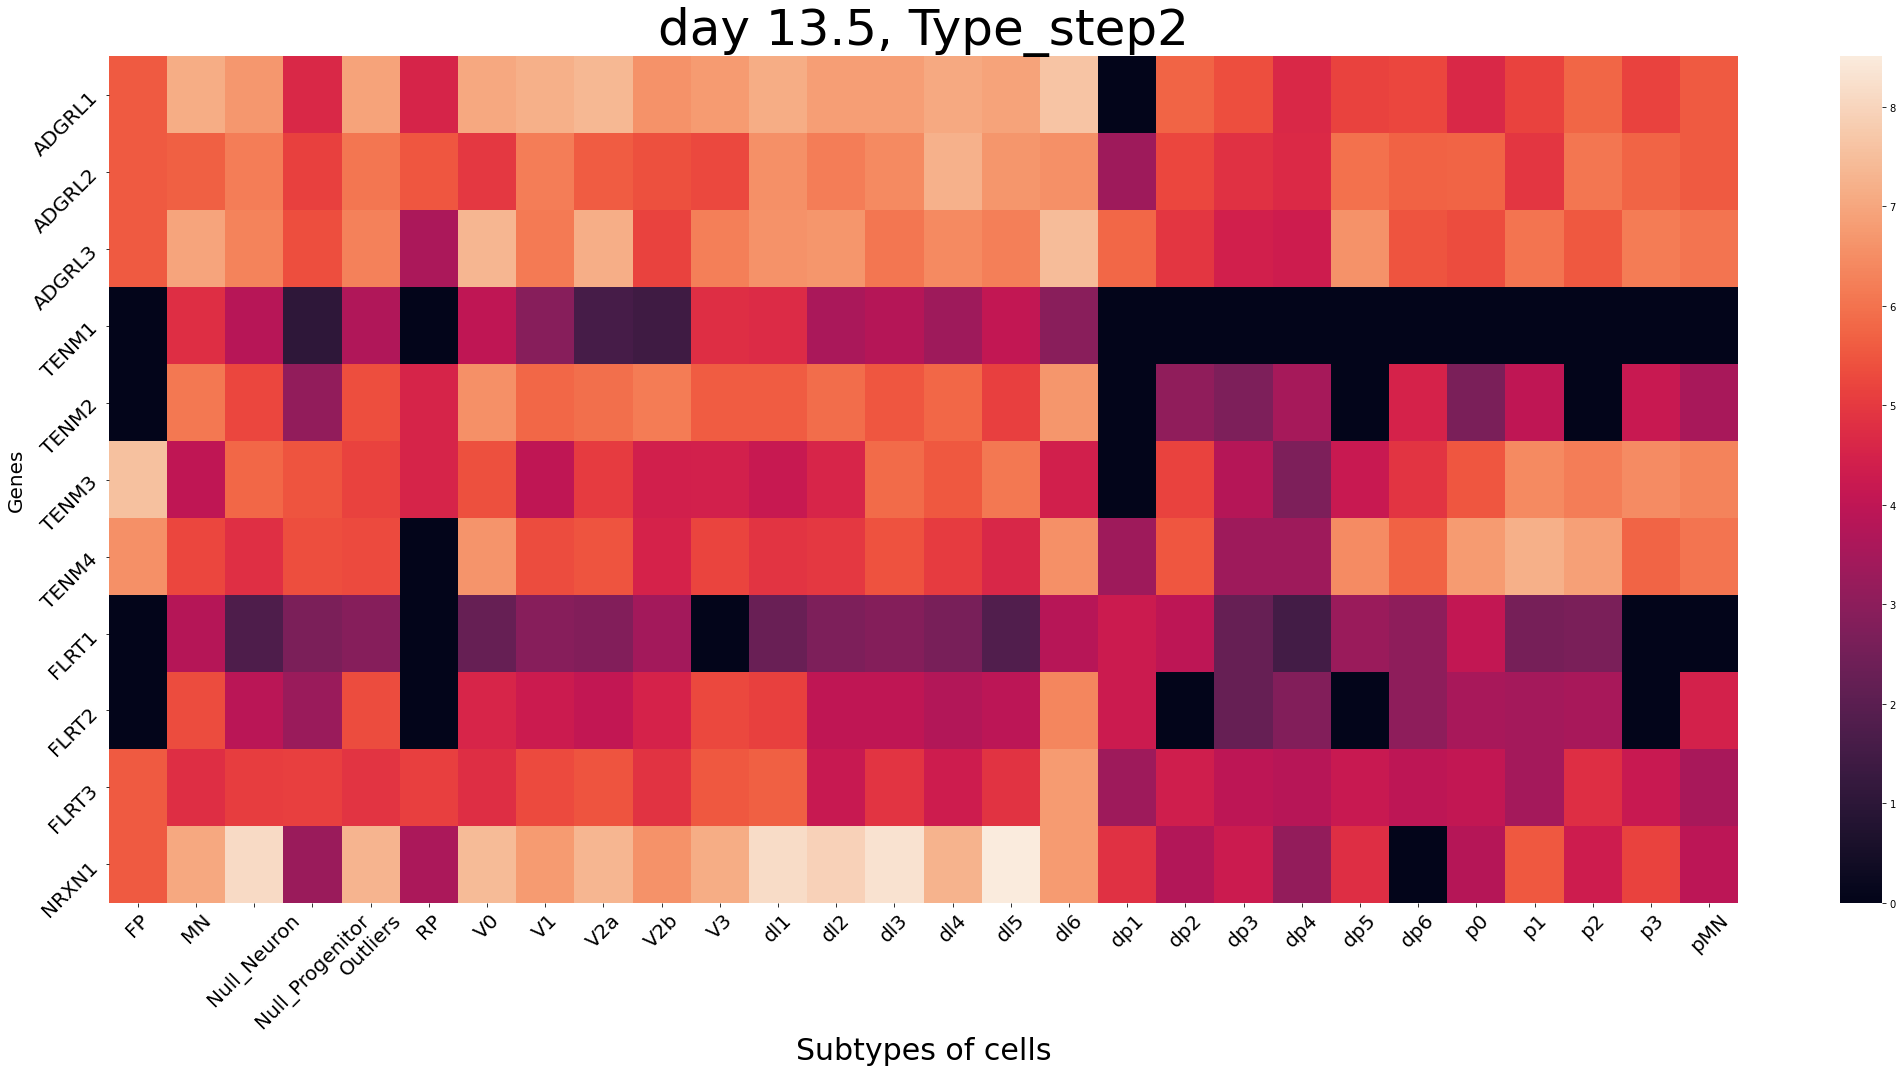

In [109]:
for cols in columns:
    for tp in timepoints:
        data = counts_ts_tp(cols, tp)
        
        barplot(data, tp, cols)
        heatmap(data, tp, cols)
        

In [71]:
savefig("day_{a}_{b}.pdf".format(a="timepoints", b="type_step_x"), dpi=1000)



'day_timepoints_type_step_x.pdf'